In [1]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/Users/zhangzijian/Desktop/Learning/6912pre/IS6912 Materials/code'

# Data Preprocess

In [4]:
path='/Users/zhangzijian/Desktop/Learning/6912pre/IS6912 Materials/data/kickstarter_all_datatrain.xlsx'
df=pd.read_excel(path)

In [5]:
df.head(2)

title    goal  \
0  The 1,000,000 Photos of Bob Mizer's Athletic M...  8000.0   
1  Ride North - A moto-photographic journey from ...  8000.0   

              region  BackerNum  CreatNum     Success                Start  \
0  San Francisco, CA        NaN       NaN  successful  2012-06-07 08:33:04   
1  San Francisco, CA        NaN       NaN  successful  2014-05-16 01:03:47   

                 Close       Duration     Category  Backers  CommentNum  \
0  2012-07-16 12:00:00  39天3小时26分钟56秒  photography     97.0         1.0   
1  2014-06-15 01:03:47            30天  photography    107.0         8.0   

   PictureNum                                              Video  
0           4  https://v2.kickstarter.com/1672896642-e4GFR7iX...  
1          13  https://v2.kickstarter.com/1672896647-a0dmtKIO...

In [7]:
df.shape

(38190, 14)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(34488, 14)

In [10]:
df = df[(df.Success!='canceled')&(df.Success!='submitted')&(df.Success!='live')&(df.Success!='started')]
df.Success = df.Success.replace(['successful','failed','success'],[1,0,1]) 

In [11]:
Duration=[]
for i in df['Duration']:
    Duration.append(i[0:i.rfind('天')])
    

In [12]:
Category=[]
for i in df['Category']:
    Category.append(i[0:i.rfind('/')])

In [13]:
state=[]
for i in df['region']:
    #print(str(i).split(',')[-1][-2:])
    state.append(str(i).split(',')[-1][-2:])

In [14]:
Video=[]
for i in df['Video']:
    if 'http' in str(i):
        i=1
    else:
        i=0
    Video.append(i)
df=df.assign(Video=Video,Duration=Duration,Category=Category,state=state)   

In [15]:
df=df[df.state.isin(['CA', 'NY', 'TX', 'FL', 'GA', 'IL', 'WA', 'NC', 'OH', 'OR', 'MA', 'PA',
       'MI', 'MN', 'TN', 'CO', 'NJ', 'VA', 'NV', 'AZ', 'LA', 'MO', 'IN', 'MD',
       'DC', 'CT', 'UT', 'AL', 'SC', 'KY', 'OK', 'HI', 'WI', 'MT', 'NM', 'ME',
       'AR', 'IA', 'ND', 'KS', 'DE', 'MS', 'VT', 'NE', 'NH', 'ID', 'NZ', 'SD',
       'AK', 'AU', 'WV', 'RI'])]

In [16]:
df.Category = df.Category.replace(['ar','photograph','danc','fashio','film & vide','comic','theate','technolog','foo','desig','publishin','game'],['art','photography','dance','fashion','film & video','comics','theater','technology','food','design','publishing','games']) 

In [17]:
df=df[['state','Success','goal','Duration','Backers','CommentNum','PictureNum','Video','Category','BackerNum','CreatNum']]
df.head(7)
df.Duration=np.array(df.Duration,dtype=np.float) 
#df.Success=np.array(df.Success,dtype=np.float) 
df.shape
df.describe()

/var/folders/x9/pl62rt7j4870z8tftqskk7jm0000gn/T/ipykernel_80053/547683154.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.Duration=np.array(df.Duration,dtype=np.float)


Success          goal      Duration        Backers     CommentNum  \
count  26619.000000  2.661900e+04  26619.000000   26594.000000   26276.000000   
mean       0.726812  1.001393e+05     32.704234     618.673874     317.843013   
std        0.445605  2.032952e+06     12.134689    3852.347125    3768.614589   
min        0.000000  1.000000e+00      1.000000       0.000000       0.000000   
25%        0.000000  2.000000e+03     29.000000      18.000000       0.000000   
50%        1.000000  5.000000e+03     30.000000      71.000000       3.000000   
75%        1.000000  1.500000e+04     34.000000     236.000000      19.000000   
max        1.000000  1.000000e+08     91.000000  219382.000000  216255.000000   

         PictureNum         Video    BackerNum     CreatNum  
count  26619.000000  26619.000000  3577.000000  15102.00000  
mean      11.269507      0.623314    57.446184      3.75937  
std       17.387696      0.484564   120.460892      7.23921  
min        0.000000      0.000000     0.000000      1.00000  
25%        0.000000      0.000000     2.000000      1.00000  
50%        5.000000      1.000000    14.000000      1.00000  
75%       15.000000      1.000000    62.000000      3.00000  
max      573.000000      1.000000  2045.000000    111.00000

In [18]:
df.Category.value_counts()

art             4859
music           2762
games           2514
comics          1992
technology      1941
journalism      1537
musi            1420
photography     1256
dance           1119
film & video    1098
craft           1032
publishing      1031
design           958
crafts           938
journalis        712
fashion          619
food             563
theater          268
Name: Category, dtype: int64

# Exploration Visualization

In [19]:
df_ = df[['state','Success']]
a = df_.groupby('state')['Success'].value_counts()
State_ = df_['state'].value_counts().index.tolist()

In [20]:
success_ratio = []
b = []
c = []
d = []
for i in range(len(State_)):
    for j in range(len(a)):
        if State_[i] == a.index[j][0]:
            b.append(a.values[j])
        if State_[i] == a.index[j][0] and a.index[j][1] == 1:
            c.append(a.values[j])
    d.append(sum(c)/sum(b))
    d.append(State_[i])
    success_ratio.append(d)
    b = []
    c = []
    d = []

In [21]:
e = []
for i in df['state']:
    for j in range(len(success_ratio)):
        if i == success_ratio[j][1]:
            e.append(success_ratio[j][0])
            
df['success_ratio'] = e
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26619 entries, 0 to 38189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          26619 non-null  object 
 1   Success        26619 non-null  int64  
 2   goal           26619 non-null  float64
 3   Duration       26619 non-null  float64
 4   Backers        26594 non-null  float64
 5   CommentNum     26276 non-null  float64
 6   PictureNum     26619 non-null  int64  
 7   Video          26619 non-null  int64  
 8   Category       26619 non-null  object 
 9   BackerNum      3577 non-null   float64
 10  CreatNum       15102 non-null  float64
 11  success_ratio  26619 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 2.6+ MB


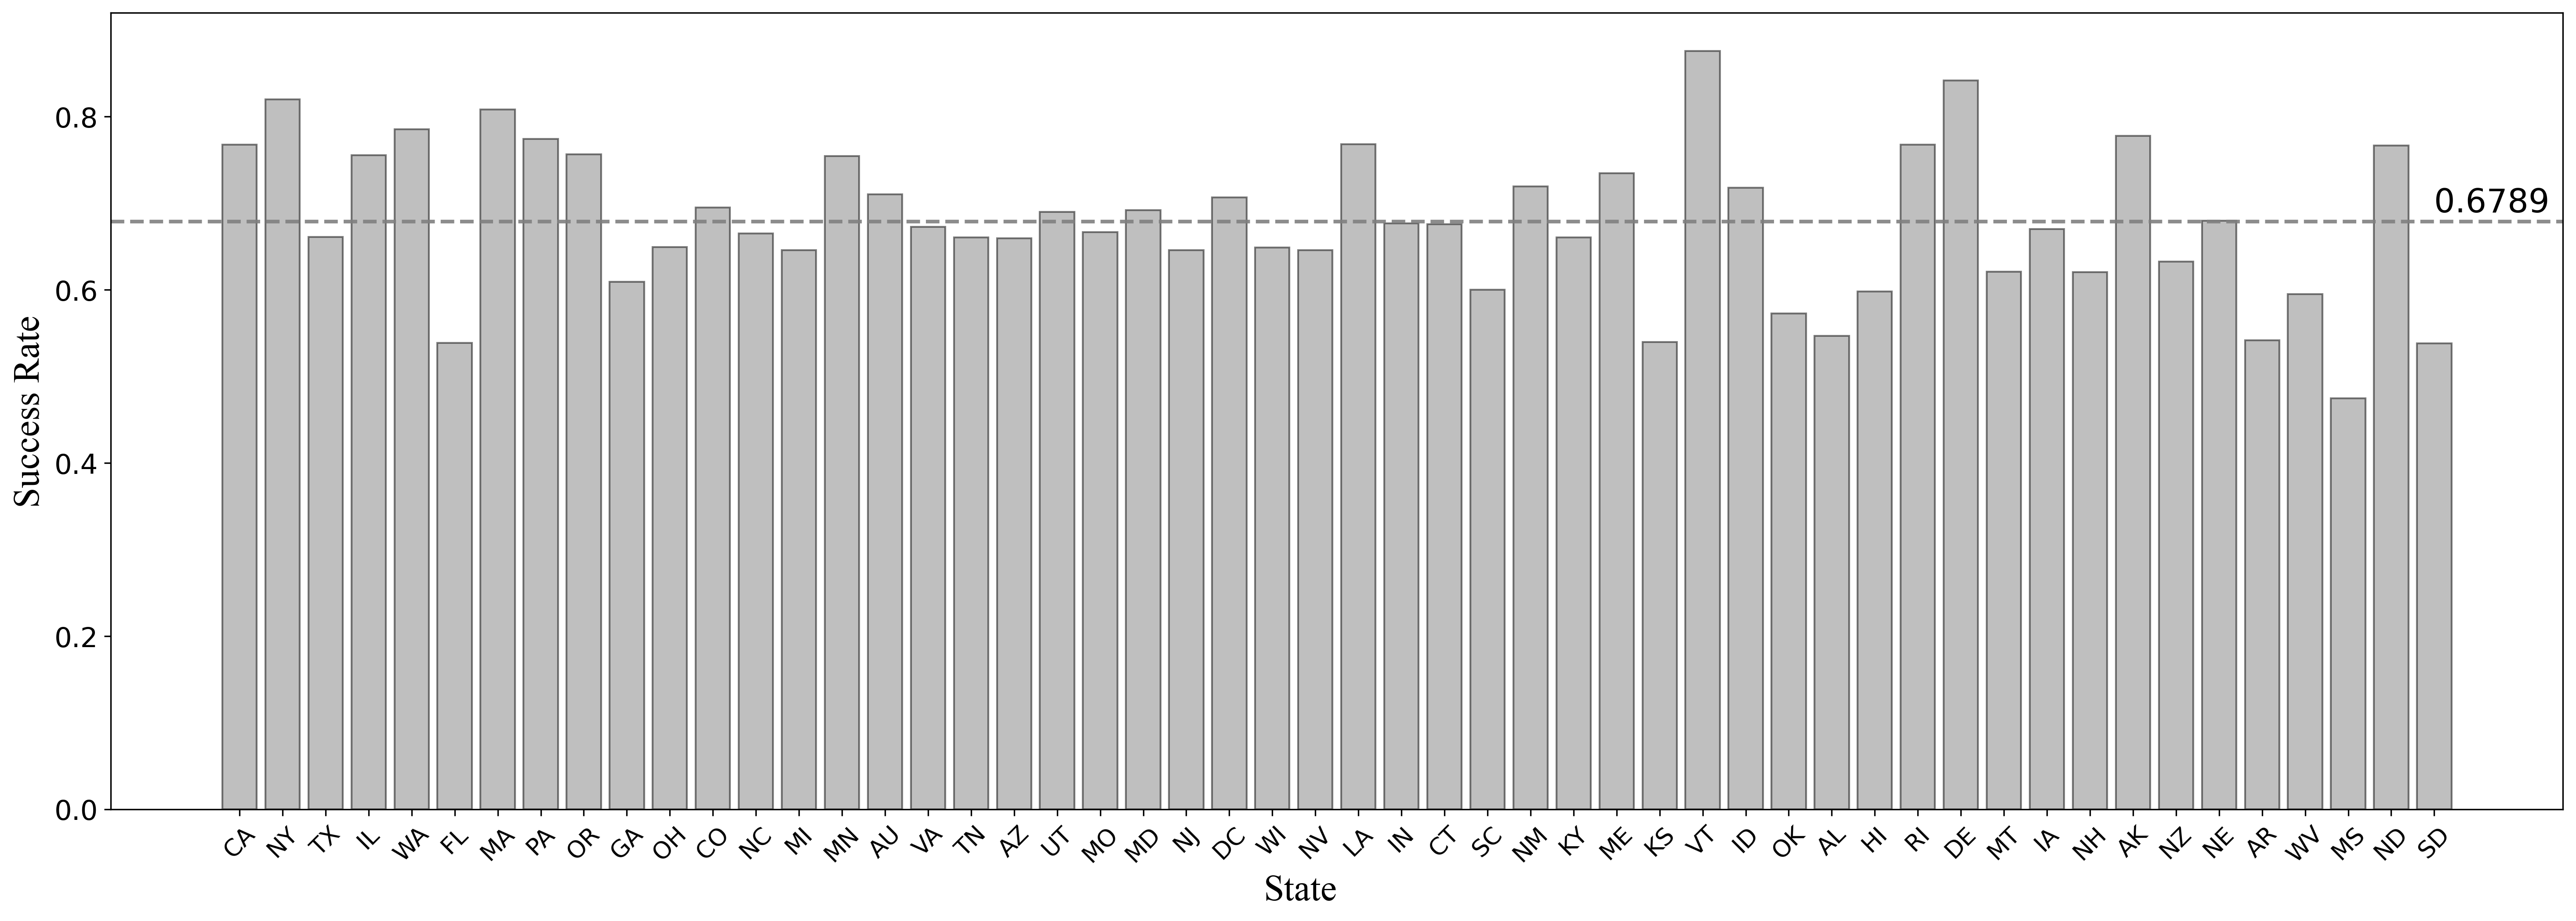

In [22]:
State_display=[]
success_ratio_display=[]
for i in success_ratio:
    success_ratio_display.append(i[0])
    State_display.append(i[1])
    

plt.figure(dpi=300,figsize=(24,8))
plt.bar(State_display,success_ratio_display,alpha=0.5,color='grey',edgecolor='black')
a=np.mean(success_ratio_display)
plt.axhline(a,linestyle='--',color='grey',label='Average success ratio',alpha=0.9,linewidth=2.0  )
plt.text('SD',0.69,0.6789,fontsize=18)
plt.xlabel("State", fontproperties='Times New Roman',fontsize=20,ha='right')
plt.ylabel("Success Rate",fontproperties='Times New Roman', fontsize=20)
plt.xticks(size=13)
plt.yticks(size=15)


plt.xticks(rotation=45)
plt.savefig("1",dpi=1200)
plt.show()

# Benchmark model: testing for what structured data influence crowdfunding?

In [23]:
df=df[(df.state!='NZ')]
Category_dummy=pd.get_dummies(df['Category'],prefix='Category',drop_first=True)
df=pd.concat([Category_dummy,df],axis=1)

state_dummy=pd.get_dummies(df['state'],prefix='state',drop_first=False)
df=pd.concat([state_dummy,df],axis=1)

state_dummy.columns.tolist()
list1=['state_AK','state_AL','state_AR','state_AU','state_AZ','state_CA','state_CO','state_CT','state_DC','state_DE','state_FL','state_GA',
'state_HI','state_IA','state_ID','state_IL','state_IN','state_KS','state_KY','state_LA','state_MA','state_MD','state_ME','state_MI',
'state_MN','state_MO','state_MS','state_MT','state_NC','state_ND','state_NE','state_NH','state_NJ','state_NM','state_NV','state_NY',
'state_OH','state_OK','state_OR','state_PA','state_RI','state_SC','state_SD','state_TN','state_TX','state_UT','state_VA','state_VT','state_WA','state_WI','state_WV']
lst=[]
for i in list1:
    lst.append(i[6:8])

In [26]:
import statsmodels.formula.api as smf
regression = smf.ols(formula='Success~Duration+goal+Backers+CommentNum+PictureNum+Video+BackerNum+CreatNum+Category_dummy+state_dummy',data=df)
model0 = regression.fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Success   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     24.99
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          9.17e-263
Time:                        20:06:43   Log-Likelihood:                 970.68
No. Observations:                3474   AIC:                            -1791.
Df Residuals:                    3399   BIC:                            -1330.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.9033      0.014     66.589      0.000       0.877       0.930
Duration              -0.0023      0.000     -7.490      0.000      -0.003      -0.002
goal               -2.116e-07   1.73e-08    -12.258      0.000   -2.45e-07   -1.78e-07
Backers             9.624e-07   5.86e-07      1.644      0.100   -1.86e-07    2.11e-06
CommentNum         -3.742e-07   5.62e-07     -0.666      0.506   -1.48e-06    7.28e-07
PictureNum             0.0004      0.000      3.009      0.003       0.000       0.001
Video                  0.2023      0.008     25.012      0.000       0.186       0.218
BackerNum           5.838e-05   2.91e-05      2.010      0.045    1.42e-06       0.000
CreatNum               0.0015      0.000      4.468      0.000       0.001       0.002
Category_dummy[0]     -0.1203      0.010    -12.537      0.000      -0.139      -0.101
Category_dummy[1]     -0.1450      0.186     -0.779      0.436      -0.510       0.220
Category_dummy[2]     -0.0622      0.132     -0.472      0.637      -0.321       0.196
Category_dummy[3]     -0.0423      0.021     -2.062      0.039      -0.083      -0.002
Category_dummy[4]     -0.0561      0.014     -3.986      0.000      -0.084      -0.029
Category_dummy[5]     -0.1274      0.071     -1.785      0.074      -0.267       0.013
Category_dummy[6]     -0.0327      0.019     -1.709      0.088      -0.070       0.005
Category_dummy[7]     -0.2953      0.020    -14.724      0.000      -0.335      -0.256
Category_dummy[8]     -0.0836      0.012     -6.962      0.000      -0.107      -0.060
Category_dummy[9]     -0.0833      0.185     -0.449      0.653      -0.447       0.280
Category_dummy[10]    -0.2139      0.033     -6.547      0.000      -0.278      -0.150
Category_dummy[11]    -0.0688      0.025     -2.706      0.007      -0.119      -0.019
Category_dummy[12]    -0.0782      0.017     -4.599      0.000      -0.112      -0.045
Category_dummy[13]    -0.0789      0.083     -0.947      0.344      -0.242       0.084
Category_dummy[14]    -0.1930      0.016    -12.183      0.000      -0.224      -0.162
Category_dummy[15]    -0.0797      0.014     -5.509      0.000      -0.108      -0.051
Category_dummy[16]    -0.3547      0.035    -10.035      0.000      -0.424      -0.285
state_dummy[0]        -0.0468      0.069     -0.678      0.498      -0.182       0.089
state_dummy[1]        -0.0023      0.045     -0.051      0.960      -0.090       0.085
state_dummy[2]         0.0997      0.065      1.542      0.123      -0.027       0.226
state_dummy[3]         0.0461      0.019      2.371      0.018       0.008       0.084
state_dummy[4]        -0.0145      0.026     -0.566      0.571      -0.065       0.036
state_dummy[5]         0.0371      0.010      3.791      0.000       0.018       0.056
state_dummy[6]         0.0438      0.0

In [77]:
list1=Category_dummy.columns.tolist()
lst=[]
for i in list1:
    lst.append(i[9:])
    

In [78]:
Category_dummy.columns
coef = model0.params[9:26].values
coef = pd.Series(coef,index=lst)
coef_p= []
for i in range(len(model0.pvalues[9:26])):
    if abs(model0.pvalues[9:26].values[i])<0.05:
        coef_p.append(model0.params[9:26].values[i])
    else:
        coef_p.append(None)
coef_p = pd.Series(coef_p,index=lst)



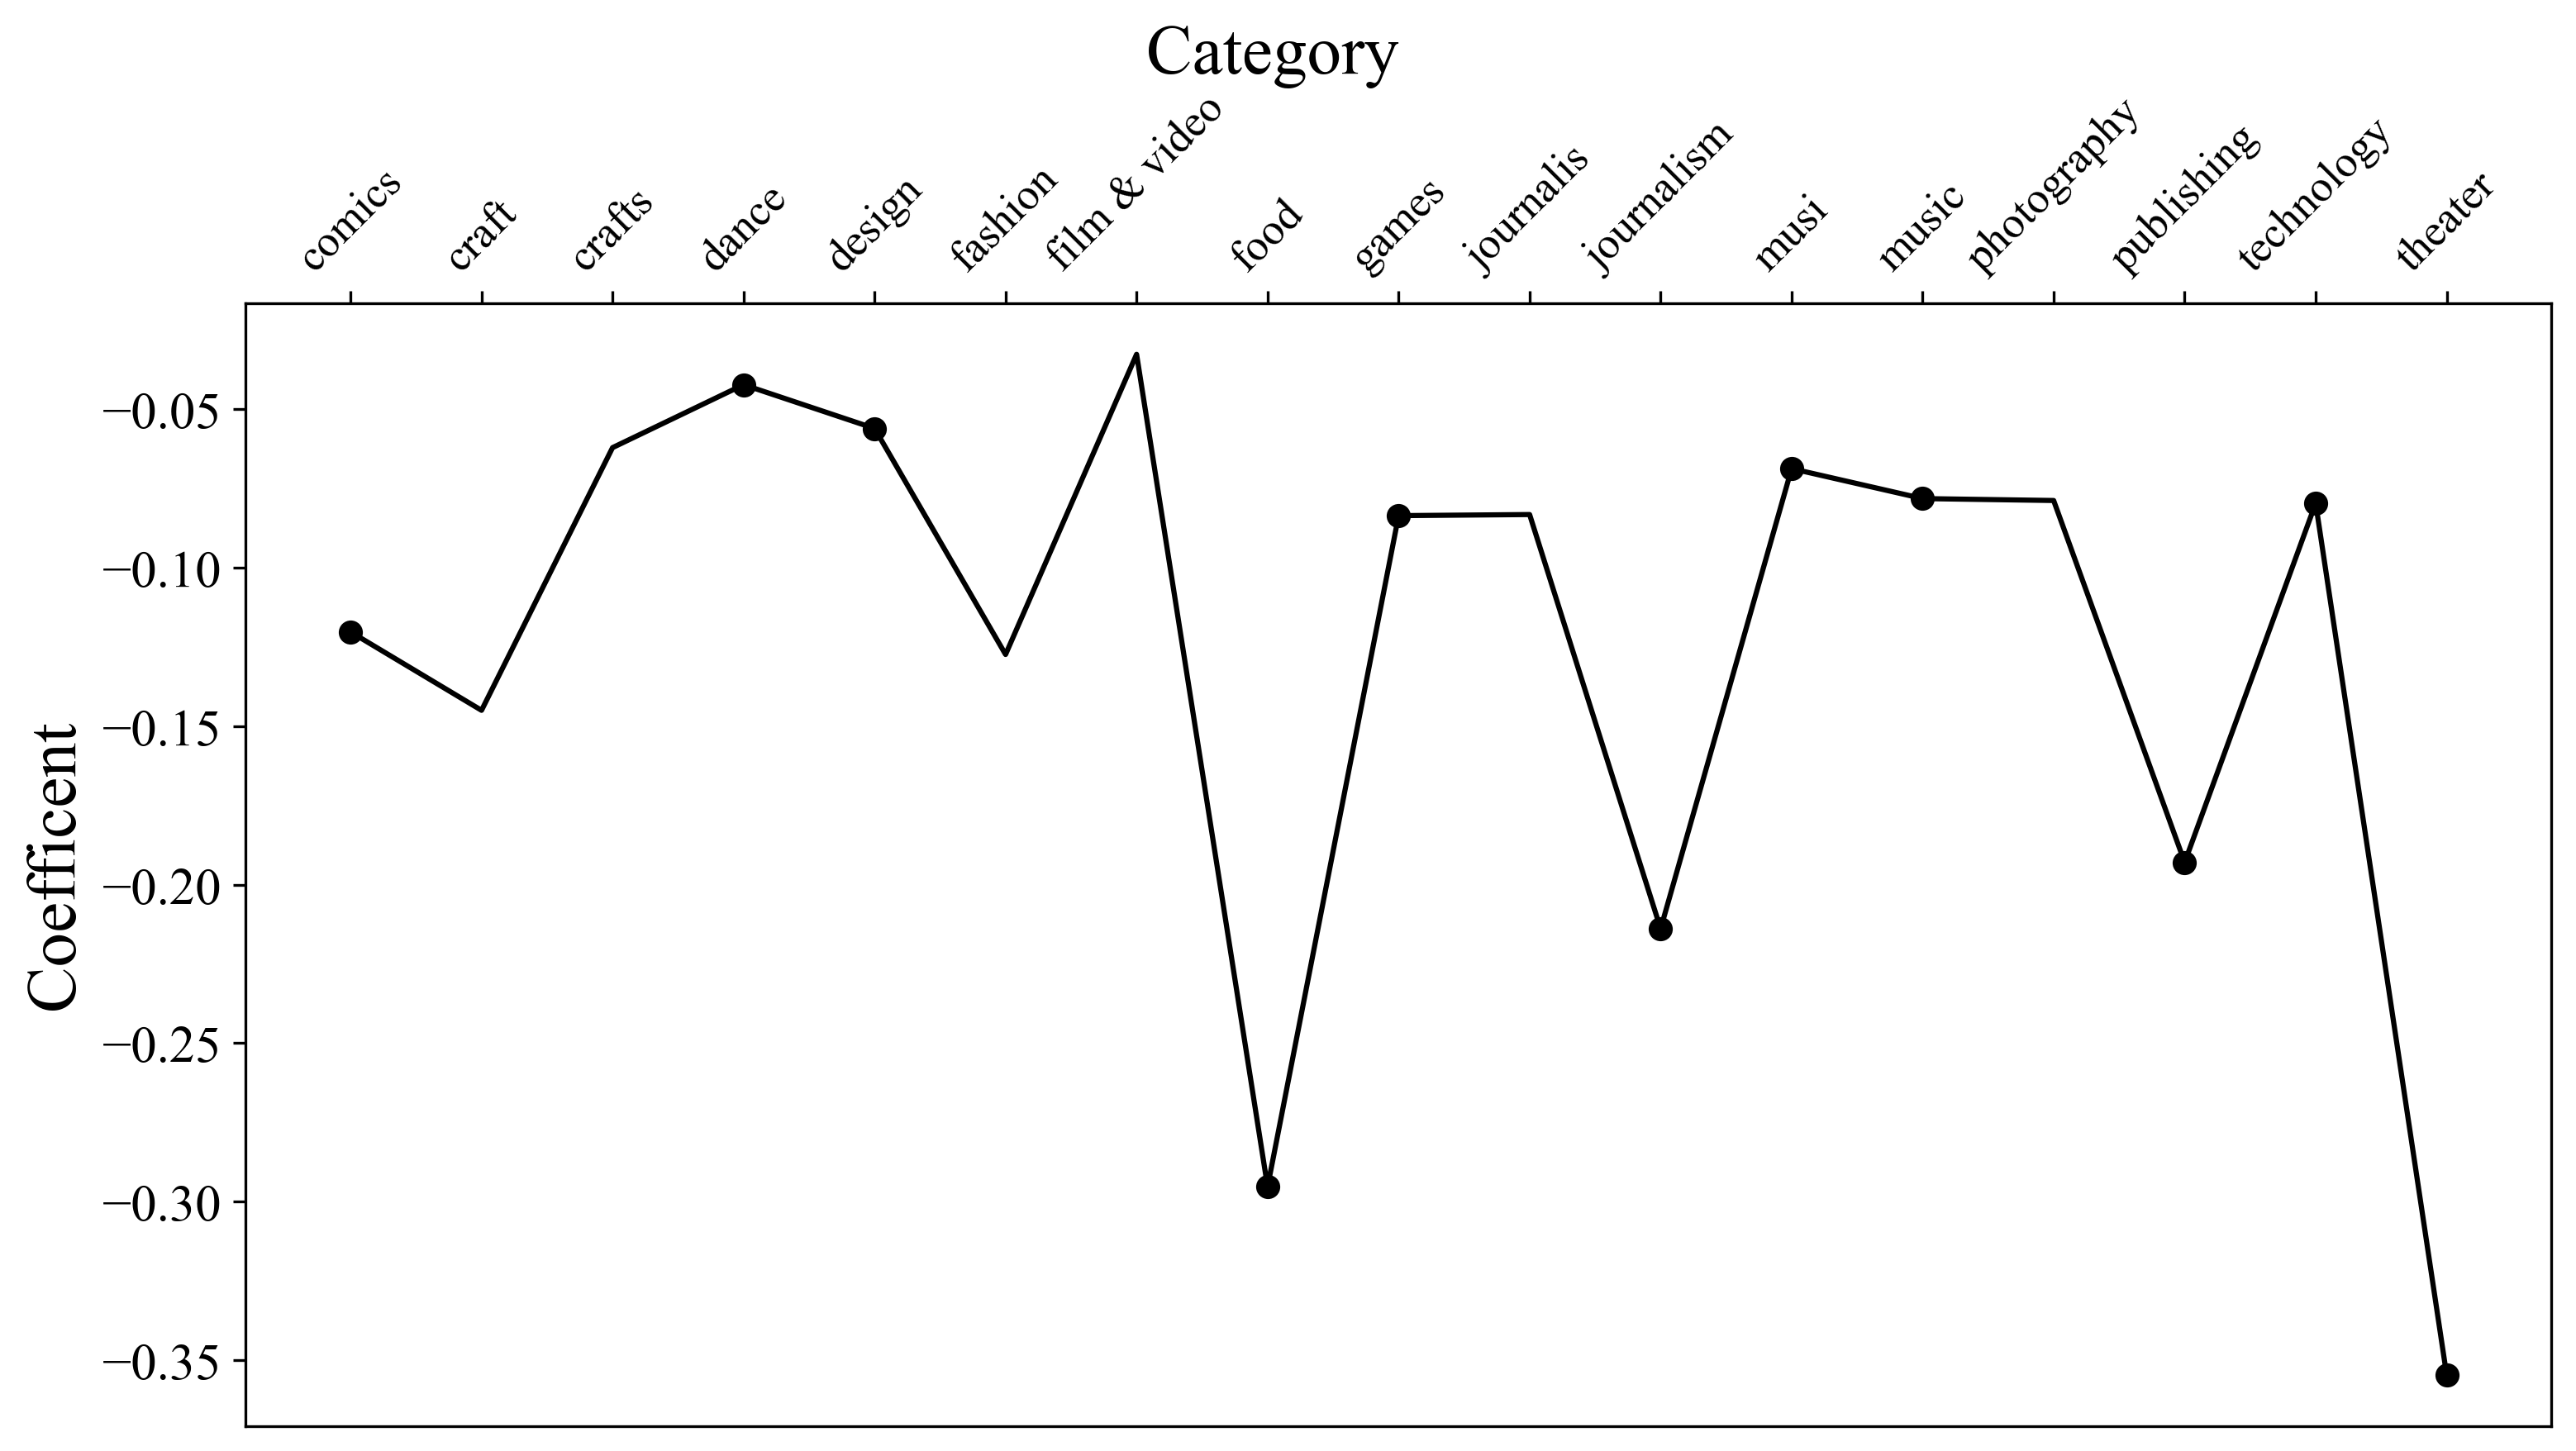

In [79]:
plt.figure(dpi=300,figsize=(12,6))
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45)
plt.plot(lst,coef,color='black')
plt.scatter(lst,coef_p,color='black')
#plt.text('OH',-0.1,'A coefficient is marked if it is significant ',fontsize=18)
plt.xticks(size=13)
plt.yticks(size=15)
plt.xlabel("Category", fontproperties='Times New Roman',fontsize=20,ha='right')
plt.ylabel("Coefficent",fontproperties='Times New Roman', fontsize=20)
plt.savefig('2',dpi=1000)


In [86]:
list2=['state_AK','state_AL','state_AR','state_AU','state_AZ','state_CA','state_CO','state_CT','state_DC','state_DE','state_FL','state_GA',
'state_HI','state_IA','state_ID','state_IL','state_IN','state_KS','state_KY','state_LA','state_MA','state_MD','state_ME','state_MI',
'state_MN','state_MO','state_MS','state_MT','state_NC','state_ND','state_NE','state_NH','state_NJ','state_NM','state_NV','state_NY',
'state_OH','state_OK','state_OR','state_PA','state_RI','state_SC','state_SD','state_TN','state_TX','state_UT','state_VA','state_VT','state_WA','state_WI','state_WV']
lst1=[]
for i in list2:
    lst1.append(i[6:8])
coef1 = model0.params[26:92].values
coef1 = pd.Series(coef1,index=lst1)
coef_p1= []
for i in range(len(model0.pvalues[26:92])):
    if abs(model0.pvalues[26:92].values[i])<0.05:
        coef_p1.append(model0.params[26:92].values[i])
    else:
        coef_p1.append(None)
coef_p1 = pd.Series(coef_p1,index=lst1)


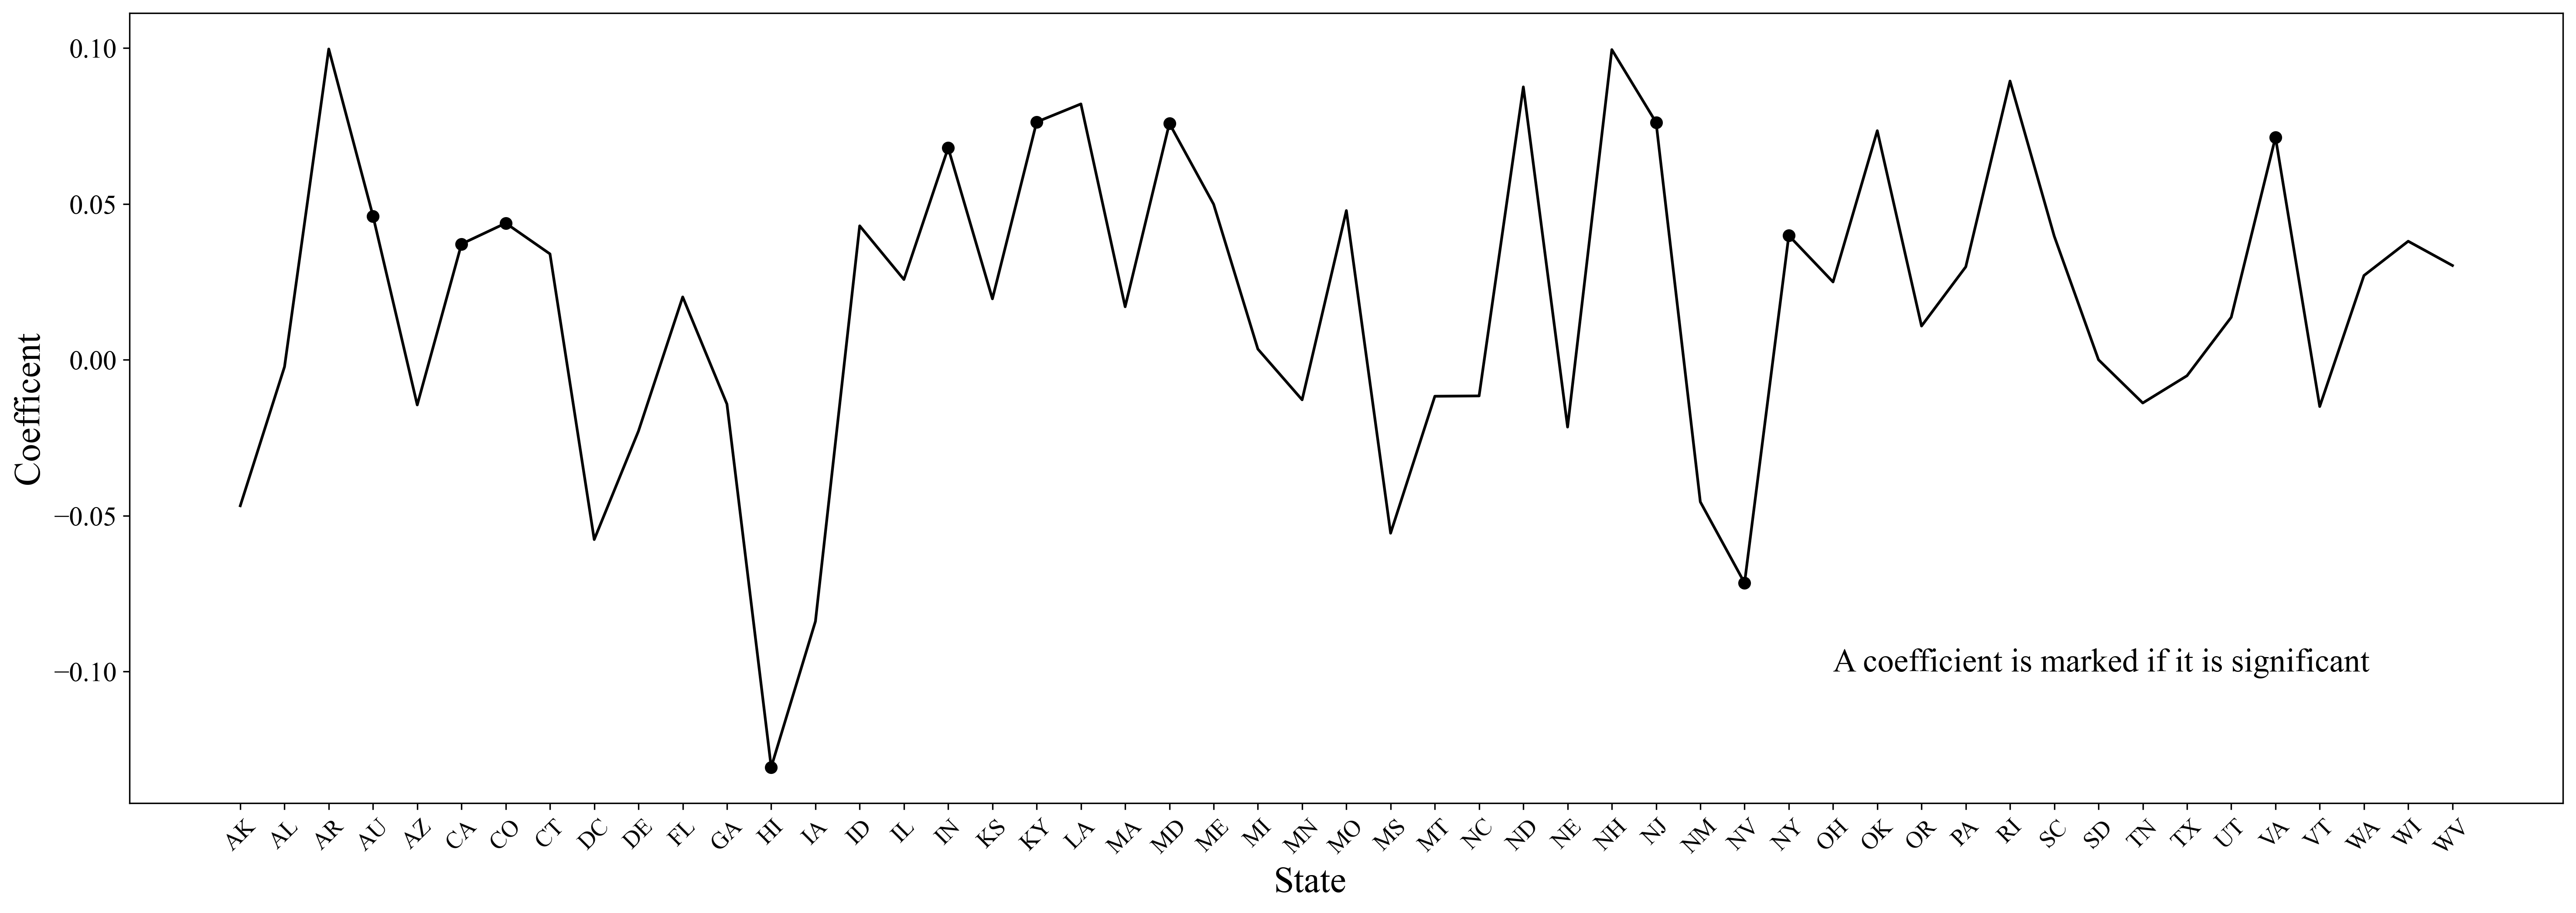

In [87]:
plt.figure(dpi=300,figsize=(24,8))
plt.xticks(rotation=45)
plt.plot(lst1,coef1,color='black')
plt.scatter(lst1,coef_p1,color='black')
plt.text('OH',-0.1,'A coefficient is marked if it is significant ',fontsize=18)
plt.xticks(size=13)
plt.yticks(size=15)
plt.xlabel("State", fontproperties='Times New Roman',fontsize=20,ha='right')
plt.ylabel("Coefficent",fontproperties='Times New Roman', fontsize=20)
plt.savefig('3',dpi=1000)


# Heterogeneity analysis：duration

In [96]:
#plt.hist(df.Duration,20)

In [24]:
df11=df[df.Duration<=30]
df11.reset_index(inplace=True)
df11=df11[(df11.state!='NZ')]
Category_dummy=pd.get_dummies(df11['Category'],prefix='Category',drop_first=True)
df11=pd.concat([Category_dummy,df11],axis=1)
state_dummy=pd.get_dummies(df11['state'],prefix='state',drop_first=False)
df11=pd.concat([state_dummy,df11],axis=1)
list1=['state_AK','state_AL','state_AR','state_AU','state_AZ','state_CA','state_CO','state_CT','state_DC','state_DE','state_FL','state_GA',
'state_HI','state_IA','state_ID','state_IL','state_IN','state_KS','state_KY','state_LA','state_MA','state_MD','state_ME','state_MI',
'state_MN','state_MO','state_MS','state_MT','state_NC','state_ND','state_NE','state_NH','state_NJ','state_NM','state_NV','state_NY',
'state_OH','state_OK','state_OR','state_PA','state_RI','state_SC','state_SD','state_TN','state_TX','state_UT','state_VA','state_VT','state_WA','state_WI','state_WV']
lst=[]
for i in list1:
    lst.append(i[6:8])
    
regression = smf.ols(formula='Success~Duration+goal+Backers+CommentNum+PictureNum+Video+BackerNum+CreatNum+Category_dummy+state_dummy',data=df11)
model11 = regression.fit()
model11.summary()

coef11 = model11.params[26:77].values
coef11 = pd.Series(coef11,index=lst)
coef_p11= []
for i in range(len(model11.pvalues[26:77])):
    if abs(model11.pvalues[26:77].values[i])<0.05:
        coef_p11.append(model11.params[26:77].values[i])
    else:
        coef_p11.append(None)
coef_p11 = pd.Series(coef_p11,index=lst)

In [25]:
df12=df[df.Duration>=30]
df12=df12[df12.Duration<60]
df12=df12[(df12.state!='NZ')]
Category_dummy=pd.get_dummies(df12['Category'],prefix='Category',drop_first=True)
df12=pd.concat([Category_dummy,df12],axis=1)
state_dummy=pd.get_dummies(df12['state'],prefix='state',drop_first=False)
df12=pd.concat([state_dummy,df12],axis=1)
list1=['state_AK','state_AL','state_AR','state_AU','state_AZ','state_CA','state_CO','state_CT','state_DC','state_DE','state_FL','state_GA',
'state_HI','state_IA','state_ID','state_IL','state_IN','state_KS','state_KY','state_LA','state_MA','state_MD','state_ME','state_MI',
'state_MN','state_MO','state_MS','state_MT','state_NC','state_ND','state_NE','state_NH','state_NJ','state_NM','state_NV','state_NY',
'state_OH','state_OK','state_OR','state_PA','state_RI','state_SC','state_SD','state_TN','state_TX','state_UT','state_VA','state_VT','state_WA','state_WI','state_WV']
lst=[]
for i in list1:
    lst.append(i[6:8])
    
regression = smf.ols(formula='Success~Duration+goal+Backers+CommentNum+PictureNum+Video+BackerNum+CreatNum+Category_dummy+state_dummy',data=df12)
model12 = regression.fit()

coef12 = model12.params[26:77].values
coef12 = pd.Series(coef12,index=lst)
coef_p12= []
for i in range(len(model12.pvalues[26:77])):
    if abs(model12.pvalues[26:77].values[i])<0.05:
        coef_p12.append(model12.params[26:77].values[i])
    else:
        coef_p12.append(None)
coef_p12 = pd.Series(coef_p12,index=lst)


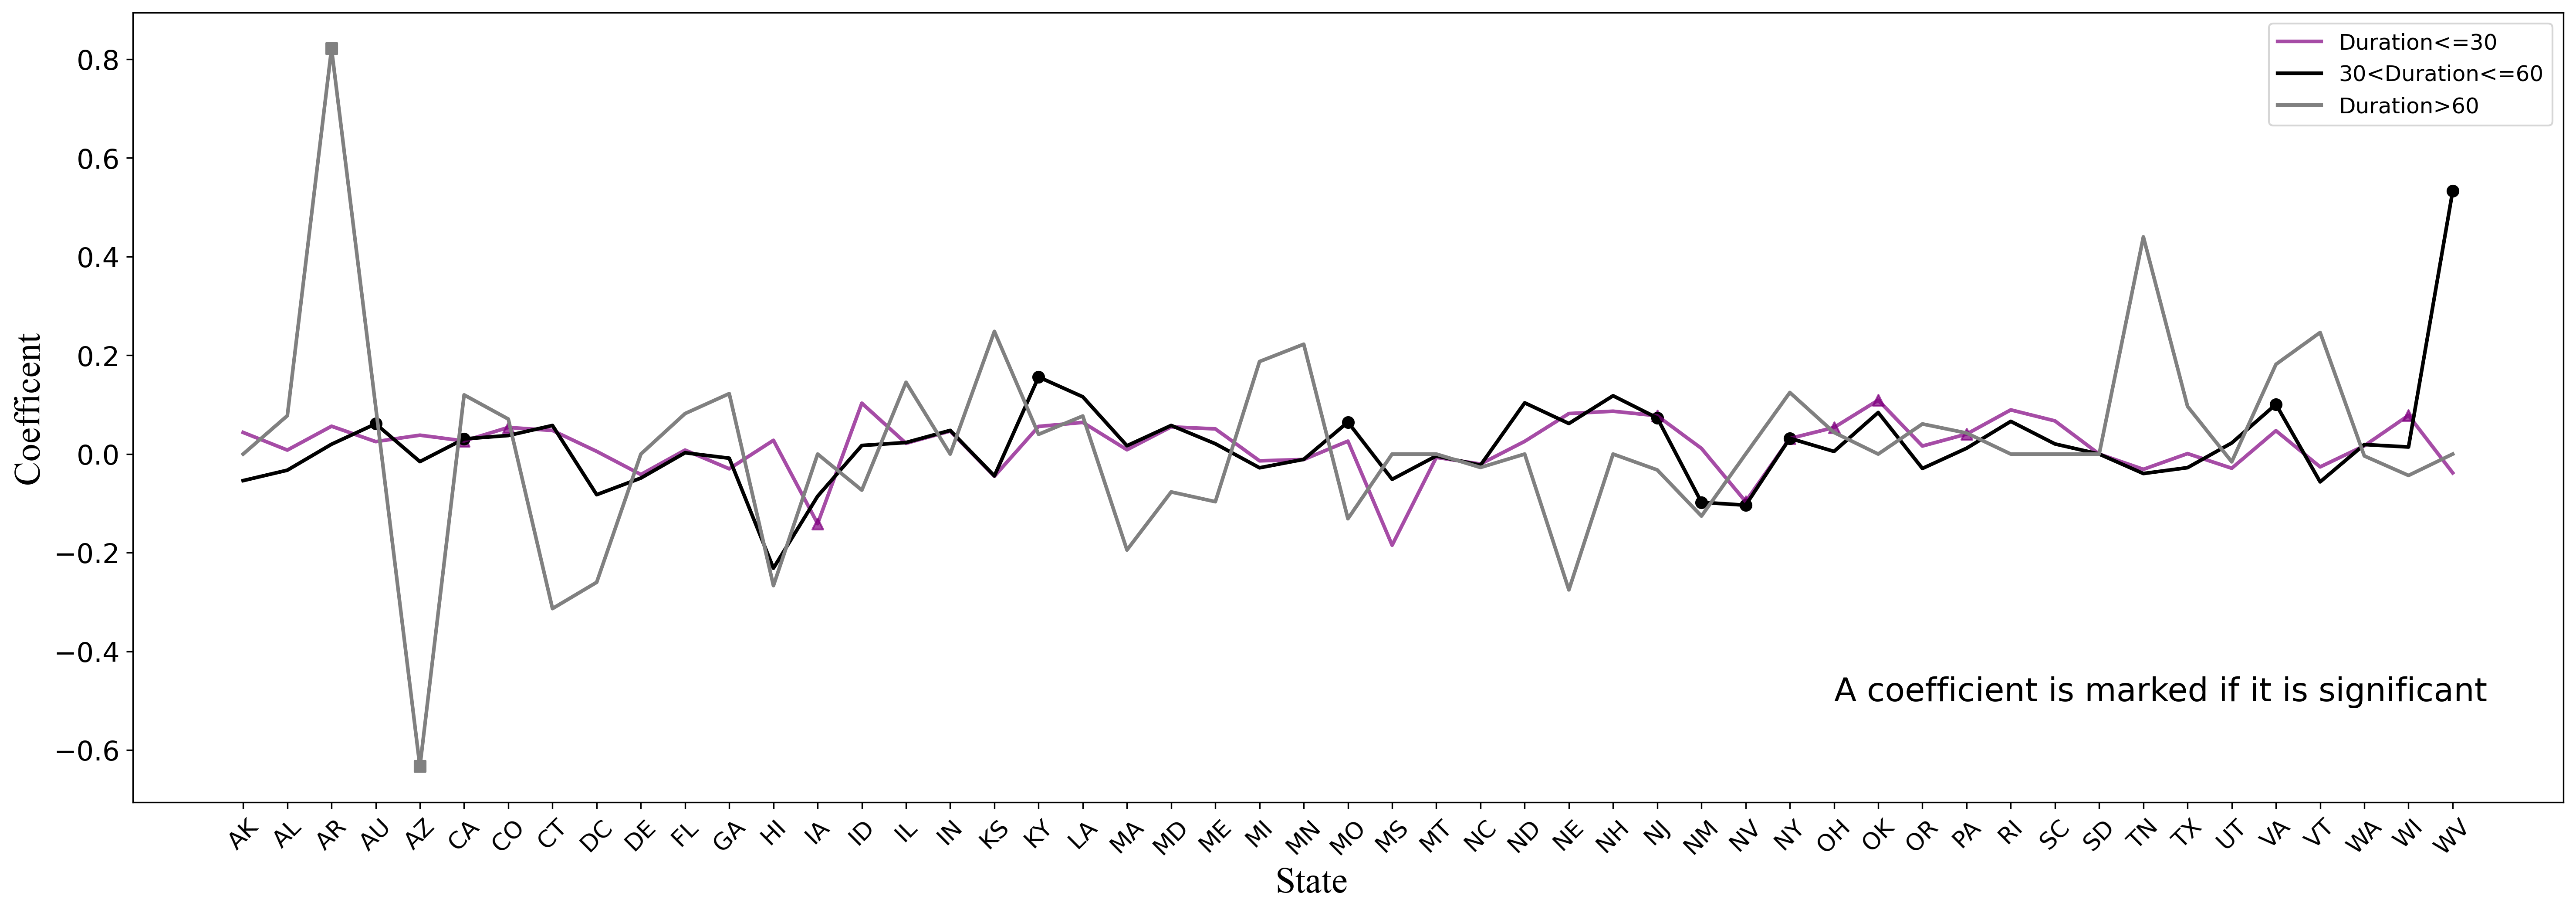

In [28]:
df13=df[df.Duration>=60]
df13.shape

df13=df13[(df13.state!='NZ')]
Category_dummy=pd.get_dummies(df13['Category'],prefix='Category',drop_first=True)
df13=pd.concat([Category_dummy,df13],axis=1)

state_dummy=pd.get_dummies(df13['state'],prefix='state',drop_first=False)
df13=pd.concat([state_dummy,df13],axis=1)

list1=['state_AK','state_AL','state_AR','state_AU','state_AZ','state_CA','state_CO','state_CT','state_DC','state_DE','state_FL','state_GA',
'state_HI','state_IA','state_ID','state_IL','state_IN','state_KS','state_KY','state_LA','state_MA','state_MD','state_ME','state_MI',
'state_MN','state_MO','state_MS','state_MT','state_NC','state_ND','state_NE','state_NH','state_NJ','state_NM','state_NV','state_NY',
'state_OH','state_OK','state_OR','state_PA','state_RI','state_SC','state_SD','state_TN','state_TX','state_UT','state_VA','state_VT','state_WA','state_WI','state_WV']
lst=[]
for i in list1:
    lst.append(i[6:8])
    
regression = smf.ols(formula='Success~Duration+goal+Backers+CommentNum+PictureNum+Video+BackerNum+CreatNum+Category_dummy+state_dummy',data=df13)
model13 = regression.fit()

coef13 = model13.params[26:77].values
coef13 = pd.Series(coef13,index=lst)
coef_p13= []
for i in range(len(model13.pvalues[26:77])):
    if abs(model13.pvalues[26:77].values[i])<0.05:
        coef_p13.append(model13.params[26:77].values[i])
    elif model13.pvalues[26:77].values[i]==None:
        coef_p13.append(0)
    else:
        coef_p13.append(None)
coef_p13 = pd.Series(coef_p13,index=lst)


plt.figure(dpi=300,figsize=(24,8))
plt.xticks(rotation=45)
plt.plot(lst,coef11,color='purple',alpha=0.7,linewidth=2,label='Duration<=30')
plt.scatter(lst,coef_p11,color='purple',alpha=0.7,marker='^')
plt.plot(lst,coef12,color='black',linewidth=2,label='30<Duration<=60')
plt.scatter(lst,coef_p12,color='black')
plt.plot(lst,coef13,color='grey',linewidth=2,label='Duration>60')
plt.scatter(lst,coef_p13,color='grey',marker=',')
plt.legend(fontsize='large') 
plt.xlabel("State", fontproperties='Times New Roman',fontsize=20,ha='right')
plt.ylabel("Coefficent",fontproperties='Times New Roman', fontsize=20)
plt.text('OH',-0.5,'A coefficient is marked if it is significant ',fontsize=18)
plt.xticks(size=13)
plt.yticks(size=15)
plt.savefig('3',dpi=900)

# Heterogeneity analysis：goal

In [29]:
import statsmodels.formula.api as smf

In [30]:
df21=df[df.goal<10000]
df21.shape

(16546, 80)

In [31]:
df22=df[df.goal<20000]
df22=df[df.goal>=10000]
df22.shape

(9994, 80)

In [32]:
df23=df[df.goal>=20000]
df23.shape

(5766, 80)

Text(OH, -0.12, 'A coefficient is marked if it is significant ')

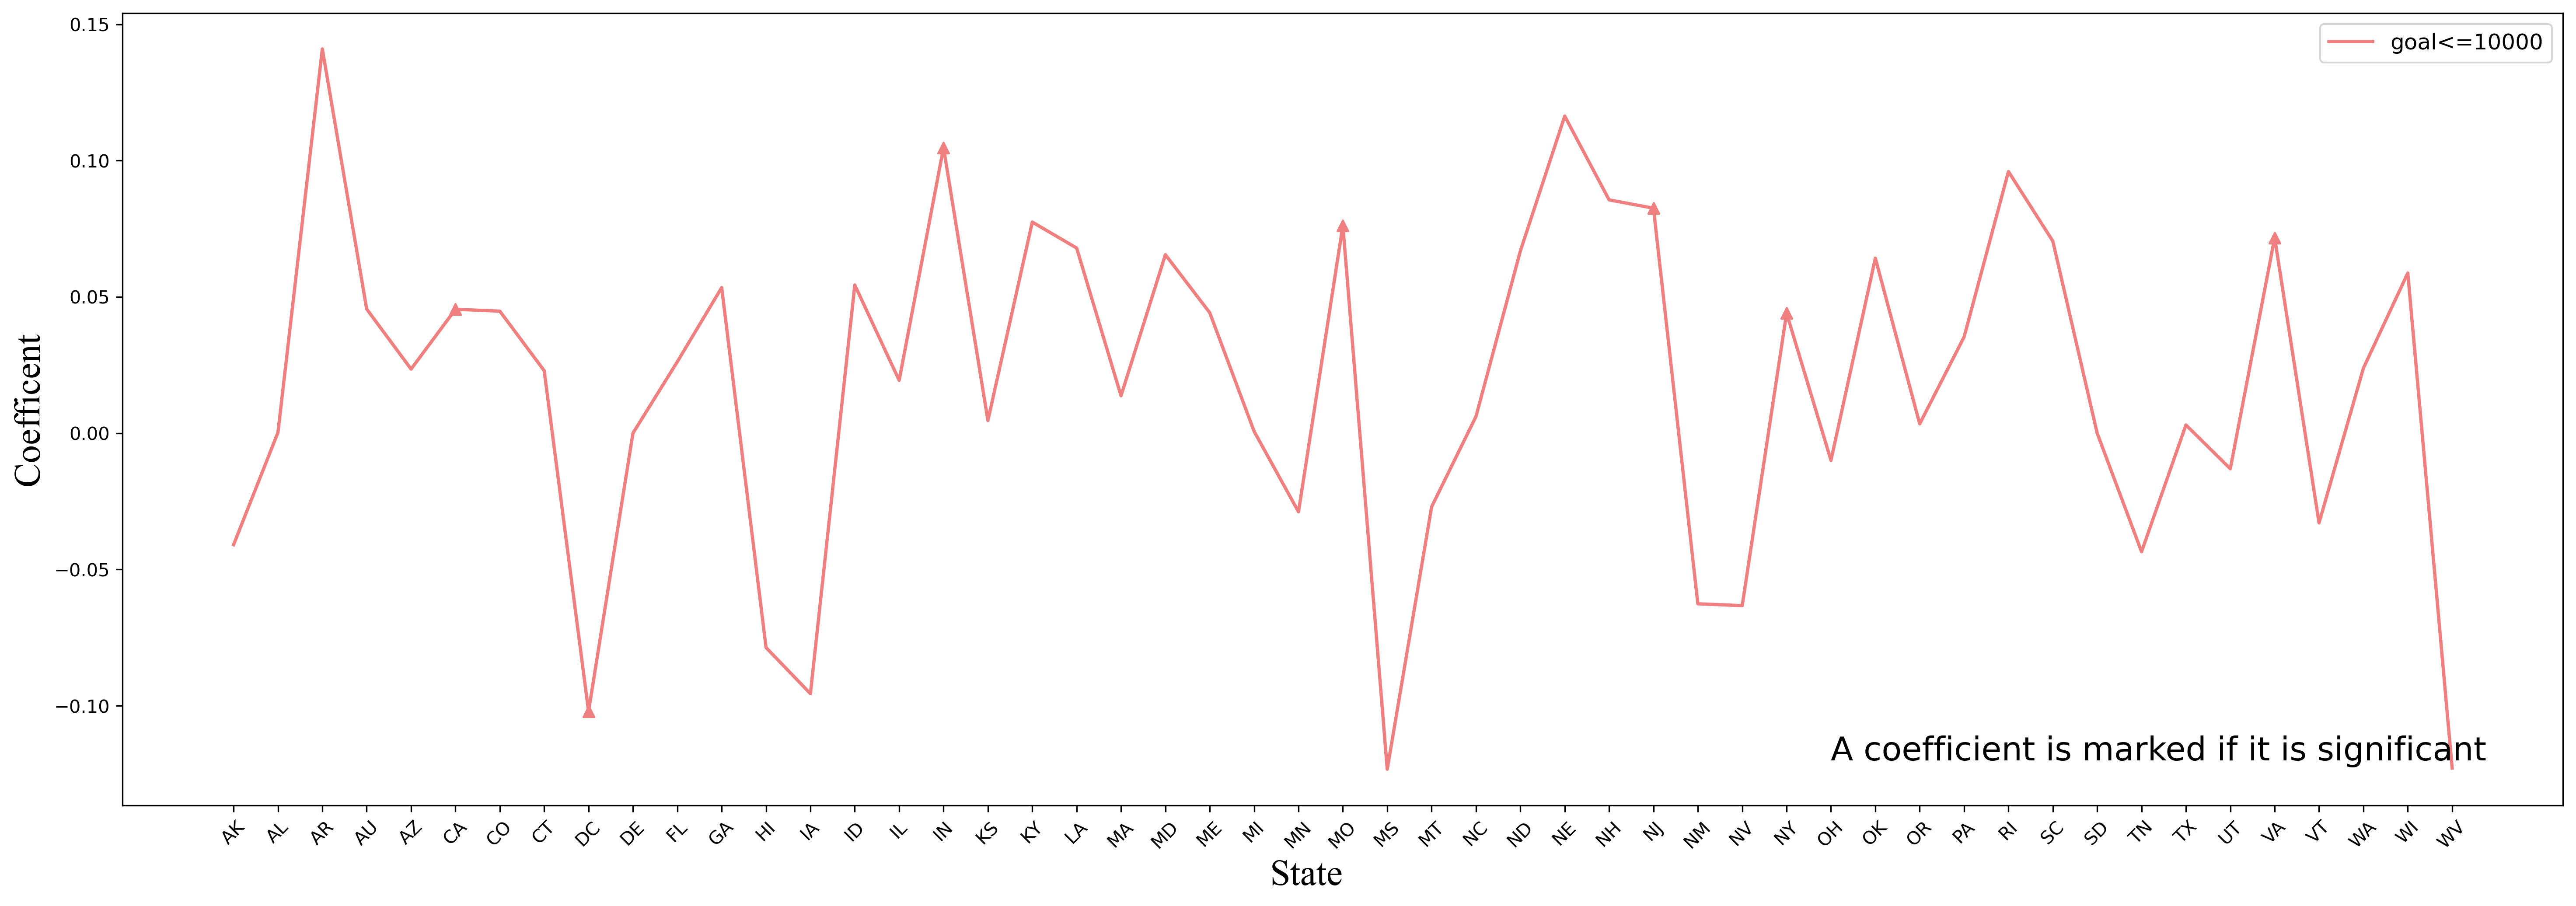

In [33]:
df21=df21[(df21.state!='NZ')]
Category_dummy=pd.get_dummies(df21['Category'],prefix='Category',drop_first=True)
df21=pd.concat([Category_dummy,df21],axis=1)

state_dummy=pd.get_dummies(df21['state'],prefix='state',drop_first=False)
df21=pd.concat([state_dummy,df21],axis=1)

list1=['state_AK','state_AL','state_AR','state_AU','state_AZ','state_CA','state_CO','state_CT','state_DC','state_DE','state_FL','state_GA',
'state_HI','state_IA','state_ID','state_IL','state_IN','state_KS','state_KY','state_LA','state_MA','state_MD','state_ME','state_MI',
'state_MN','state_MO','state_MS','state_MT','state_NC','state_ND','state_NE','state_NH','state_NJ','state_NM','state_NV','state_NY',
'state_OH','state_OK','state_OR','state_PA','state_RI','state_SC','state_SD','state_TN','state_TX','state_UT','state_VA','state_VT','state_WA','state_WI','state_WV']
lst=[]
for i in list1:
    lst.append(i[6:8])
    
regression = smf.ols(formula='Success~Duration+goal+Backers+CommentNum+PictureNum+Video+BackerNum+CreatNum+Category_dummy+state_dummy',data=df21)
model21 = regression.fit()

coef21 = model21.params[26:77].values
coef21 = pd.Series(coef21,index=lst)
coef_p21= []
for i in range(len(model21.pvalues[26:77])):
    if abs(model21.pvalues[26:77].values[i])<0.05:
        coef_p21.append(model21.params[26:77].values[i])
    elif model21.pvalues[26:77].values[i]==None:
        coef_p21.append(0)
    else:
        coef_p21.append(None)
coef_p21 = pd.Series(coef_p21,index=lst)

plt.figure(dpi=300,figsize=(24,8))
plt.xticks(rotation=45)



plt.plot(lst,coef21,color='lightcoral',linewidth=1.8,label='goal<=10000')
plt.scatter(lst,coef_p21,color='lightcoral',marker='^')
plt.legend(fontsize='large') 
plt.xlabel("State", fontproperties='Times New Roman',fontsize=20,ha='right')
plt.ylabel("Coefficent",fontproperties='Times New Roman', fontsize=20)
plt.text('OH',-0.12,'A coefficient is marked if it is significant ',fontsize=18)

Text(OH, -0.12, 'A coefficient is marked if it is significant ')

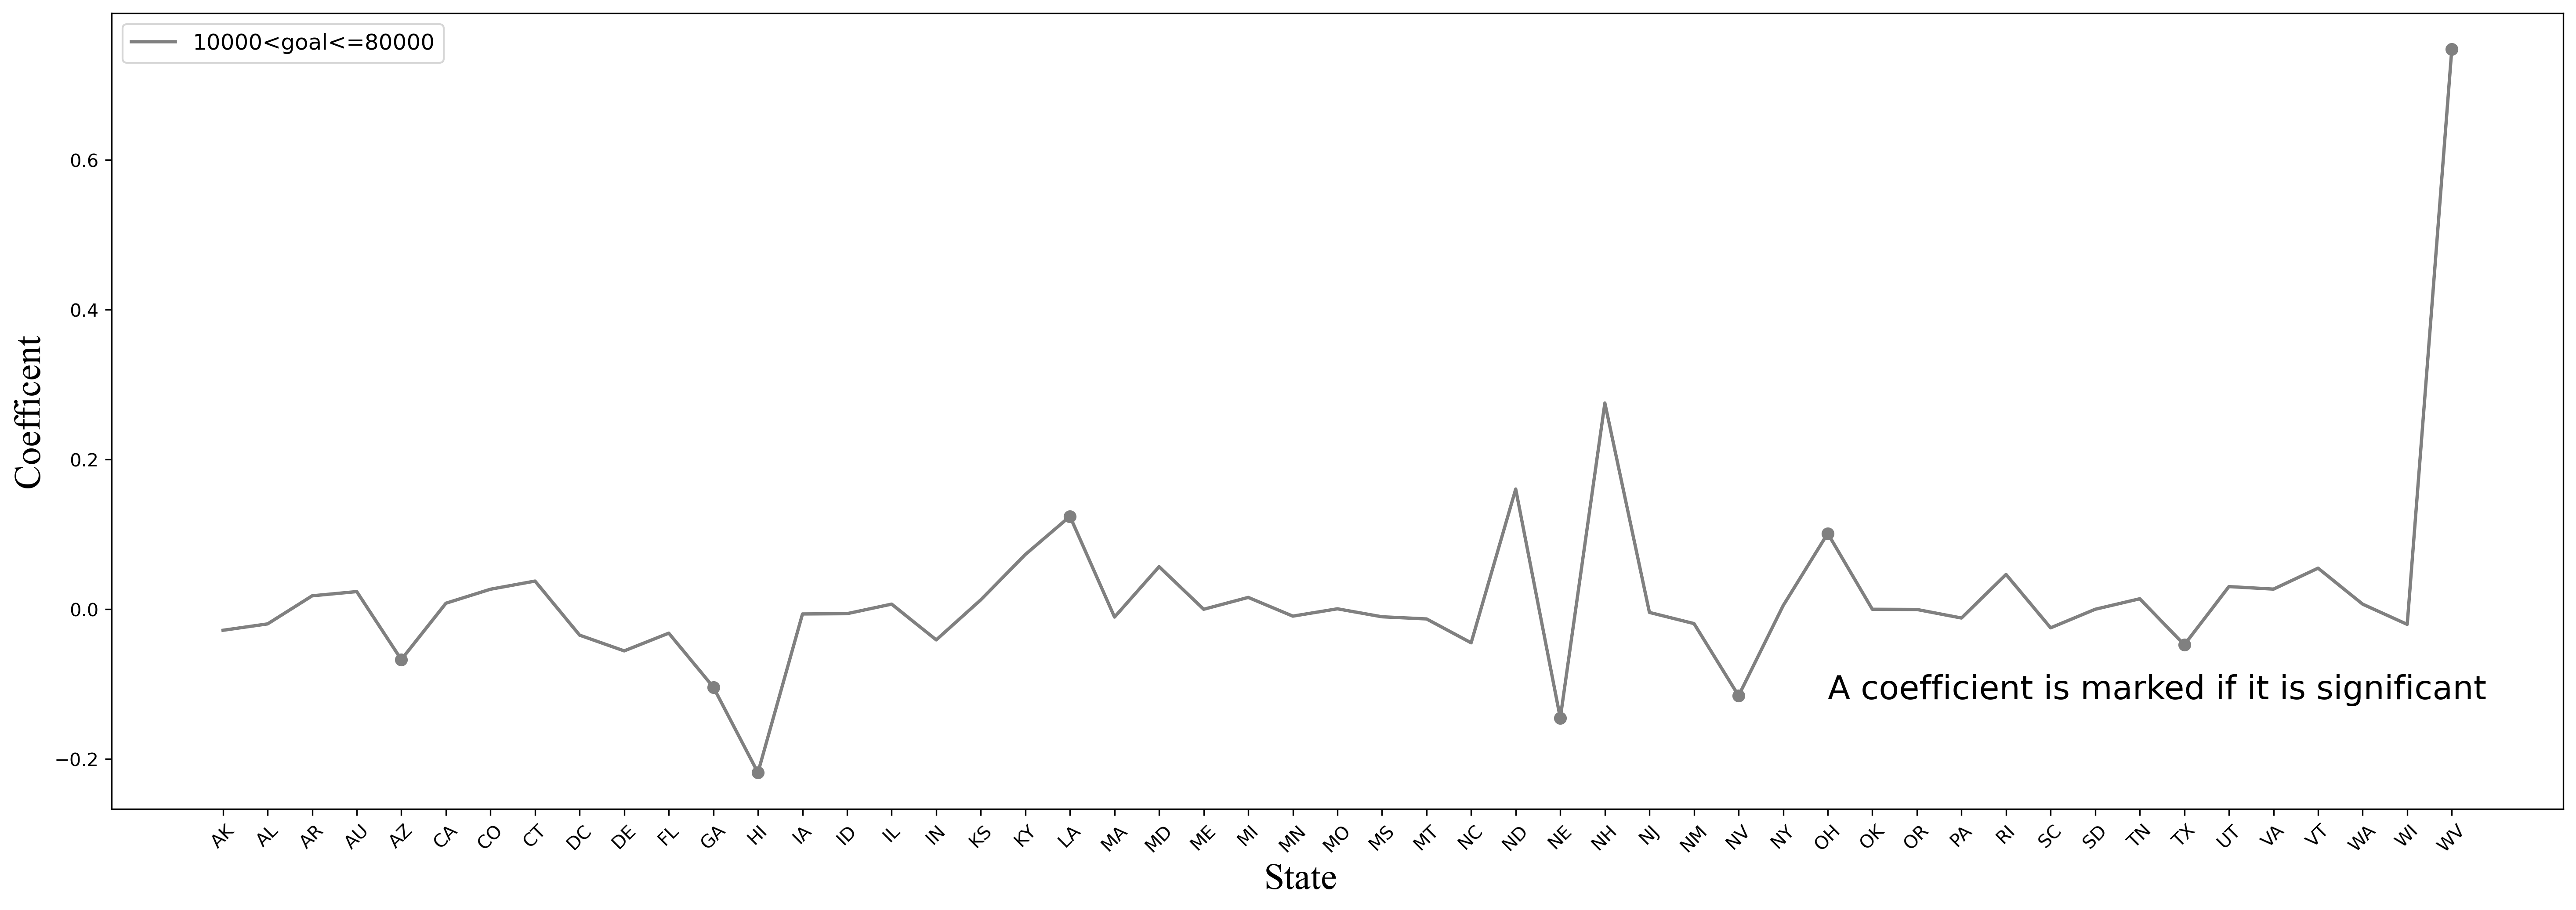

In [36]:
df22=df22[(df22.state!='NZ')]
Category_dummy=pd.get_dummies(df22['Category'],prefix='Category',drop_first=True)
df22=pd.concat([Category_dummy,df22],axis=1)

state_dummy=pd.get_dummies(df22['state'],prefix='state',drop_first=False)
df22=pd.concat([state_dummy,df22],axis=1)

list1=['state_AK','state_AL','state_AR','state_AU','state_AZ','state_CA','state_CO','state_CT','state_DC','state_DE','state_FL','state_GA',
'state_HI','state_IA','state_ID','state_IL','state_IN','state_KS','state_KY','state_LA','state_MA','state_MD','state_ME','state_MI',
'state_MN','state_MO','state_MS','state_MT','state_NC','state_ND','state_NE','state_NH','state_NJ','state_NM','state_NV','state_NY',
'state_OH','state_OK','state_OR','state_PA','state_RI','state_SC','state_SD','state_TN','state_TX','state_UT','state_VA','state_VT','state_WA','state_WI','state_WV']
lst=[]
for i in list1:
    lst.append(i[6:8])
    
regression = smf.ols(formula='Success~Duration+goal+Backers+CommentNum+PictureNum+Video+BackerNum+CreatNum+Category_dummy+state_dummy',data=df22)
model22 = regression.fit()

coef22 = model22.params[26:77].values
coef22 = pd.Series(coef22,index=lst)
coef_p22= []
for i in range(len(model22.pvalues[26:77])):
    if abs(model22.pvalues[26:77].values[i])<0.05:
        coef_p22.append(model22.params[26:77].values[i])
    elif model22.pvalues[26:77].values[i]==None:
        coef_p22.append(0)
    else:
        coef_p22.append(None)
coef_p22 = pd.Series(coef_p22,index=lst)

plt.figure(dpi=300,figsize=(24,8))
plt.xticks(rotation=45)



plt.plot(lst,coef22,color='grey',linewidth=1.8,label='10000<goal<=80000')
plt.scatter(lst,coef_p22,color='grey')
plt.legend(fontsize='large') 
plt.xlabel("State", fontproperties='Times New Roman',fontsize=20,ha='right')
plt.ylabel("Coefficent",fontproperties='Times New Roman', fontsize=20)
plt.text('OH',-0.12,'A coefficient is marked if it is significant ',fontsize=18)

In [37]:
df23=df23[(df23.state!='NZ')]
Category_dummy=pd.get_dummies(df23['Category'],prefix='Category',drop_first=True)
df23=pd.concat([Category_dummy,df23],axis=1)

state_dummy=pd.get_dummies(df23['state'],prefix='state',drop_first=False)
df23=pd.concat([state_dummy,df23],axis=1)

list1=['state_AK','state_AL','state_AR','state_AU','state_AZ','state_CA','state_CO','state_CT','state_DC','state_DE','state_FL','state_GA',
'state_HI','state_IA','state_ID','state_IL','state_IN','state_KS','state_KY','state_LA','state_MA','state_MD','state_ME','state_MI',
'state_MN','state_MO','state_MS','state_MT','state_NC','state_ND','state_NE','state_NH','state_NJ','state_NM','state_NV','state_NY',
'state_OH','state_OK','state_OR','state_PA','state_RI','state_SC','state_SD','state_TN','state_TX','state_UT','state_VA','state_VT','state_WA','state_WI','state_WV']
lst=[]
for i in list1:
    lst.append(i[6:8])
    
regression = smf.ols(formula='Success~Duration+goal+Backers+CommentNum+PictureNum+Video+BackerNum+CreatNum+Category_dummy+state_dummy',data=df23)
model23 = regression.fit()
model23.summary()
model23.params[26:78]

state_dummy[0]    -1.914710e-15
state_dummy[1]    -8.361779e-03
state_dummy[2]     2.510332e-02
state_dummy[3]     1.442192e-02
state_dummy[4]    -1.113815e-02
state_dummy[5]     2.504577e-02
state_dummy[6]     7.225228e-02
state_dummy[7]     8.574572e-02
state_dummy[8]     4.162754e-03
state_dummy[9]    -4.889762e-02
state_dummy[10]   -9.553110e-03
state_dummy[11]   -8.738210e-02
state_dummy[12]   -4.117903e-01
state_dummy[13]    2.174202e-02
state_dummy[14]    2.008095e-02
state_dummy[15]   -1.068868e-02
state_dummy[16]    5.616859e-02
state_dummy[17]    2.573652e-02
state_dummy[18]    4.811281e-01
state_dummy[19]    5.151782e-02
state_dummy[20]    6.926427e-03
state_dummy[21]    1.263172e-02
state_dummy[22]    1.688938e-16
state_dummy[23]    1.989878e-02
state_dummy[24]   -3.181508e-03
state_dummy[25]    1.040704e-01
state_dummy[26]   -2.365504e-02
state_dummy[27]    5.302340e-17
state_dummy[28]   -4.238782e-02
state_dummy[29]    1.945484e-01
state_dummy[30]   -2.784091e-01
state_du

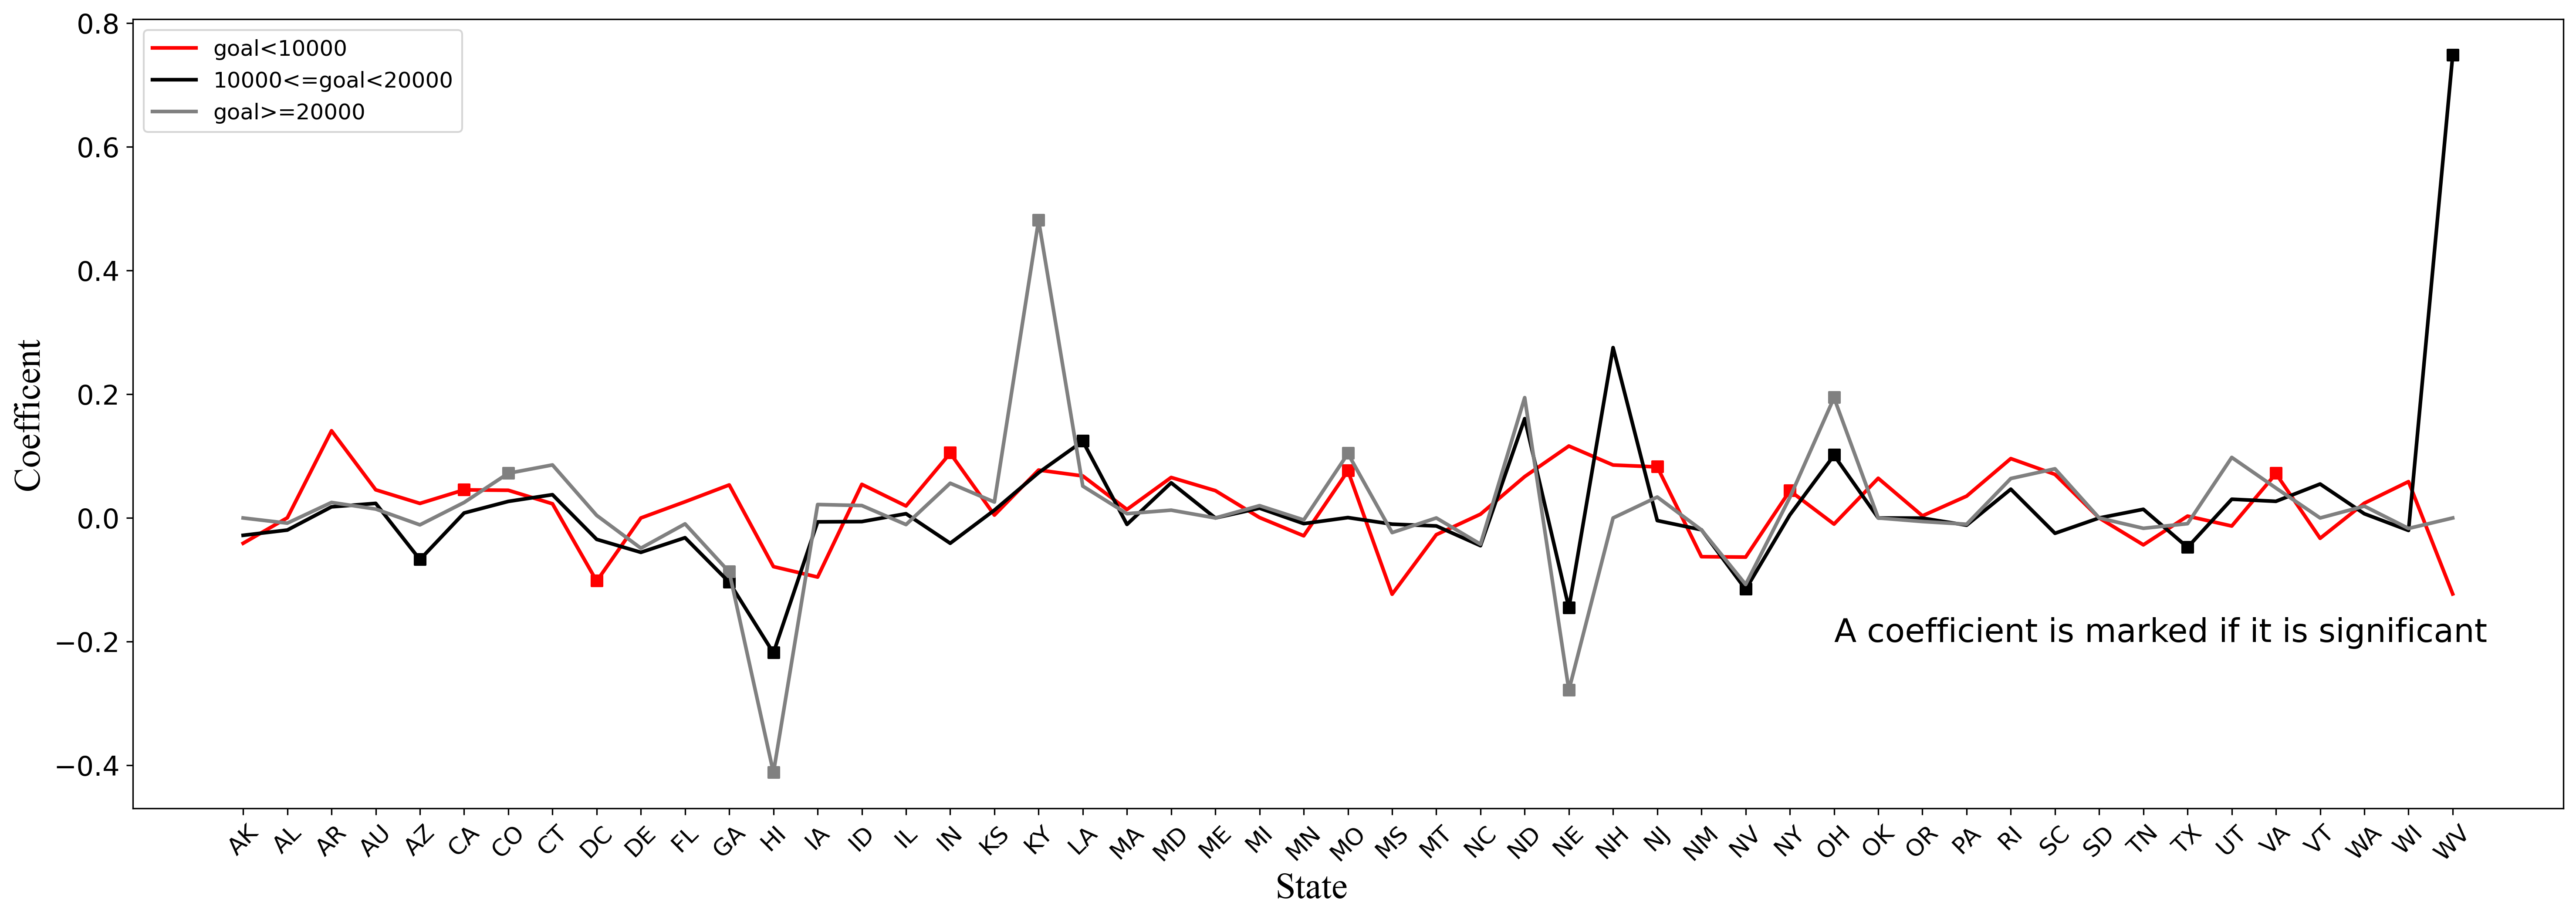

In [38]:

coef23 = model23.params[26:92].values
coef23 = pd.Series(coef23,index=lst)
coef_p23= []
for i in range(len(model23.pvalues[26:92])):
    if abs(model23.pvalues[26:92].values[i])<0.05:
        coef_p23.append(model23.params[26:92].values[i])
    elif model23.pvalues[26:92].values[i]==None:
        coef_p23.append(0)
    else:
        coef_p23.append(None)
coef_p23 = pd.Series(coef_p23,index=lst)

plt.figure(dpi=300,figsize=(24,8))
plt.xticks(rotation=45)

plt.plot(lst,coef21,color='red',linewidth=2,label='goal<10000')
plt.scatter(lst,coef_p21,color='red',marker=',')
plt.plot(lst,coef22,color='black',linewidth=2,label='10000<=goal<20000')
plt.scatter(lst,coef_p22,color='black',marker=',')
plt.plot(lst,coef23,color='grey',linewidth=2,label='goal>=20000')
plt.scatter(lst,coef_p23,color='grey',marker=',')
plt.legend(fontsize='large') 
plt.xlabel("State", fontproperties='Times New Roman',fontsize=20,ha='right')
plt.ylabel("Coefficent",fontproperties='Times New Roman', fontsize=20)
plt.text('OH',-0.2,'A coefficient is marked if it is significant ',fontsize=18)




plt.xticks(size=13)
plt.yticks(size=15)
plt.savefig('4',dpi=1200)

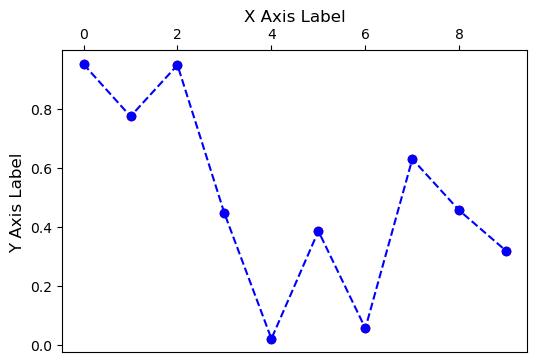

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.arange(0, 10, 1)
y = np.random.rand(10)

# 创建图形窗口
plt.figure(figsize=(6, 4), dpi=100)

# 获取坐标轴并将 x 轴刻度线和标签移到图形的上方
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

# 绘制散点图和折线图
plt.plot(x, y, color='blue', linestyle='--', marker='o')
plt.scatter(x, y, color='red')

# 设置坐标轴标签和字体属性
plt.xlabel('X Axis Label', fontsize=12)
plt.ylabel('Y Axis Label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)



plt.show()



/var/folders/x9/pl62rt7j4870z8tftqskk7jm0000gn/T/ipykernel_80053/450063382.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(lst, rotation=45, size=13)
/var/folders/x9/pl62rt7j4870z8tftqskk7jm0000gn/T/ipykernel_80053/450063382.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], size=15)
/var/folders/x9/pl62rt7j4870z8tftqskk7jm0000gn/T/ipykernel_80053/450063382.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(lst1, rotation=45, size=13)
/var/folders/x9/pl62rt7j4870z8tftqskk7jm0000gn/T/ipykernel_80053/450063382.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], size=15)


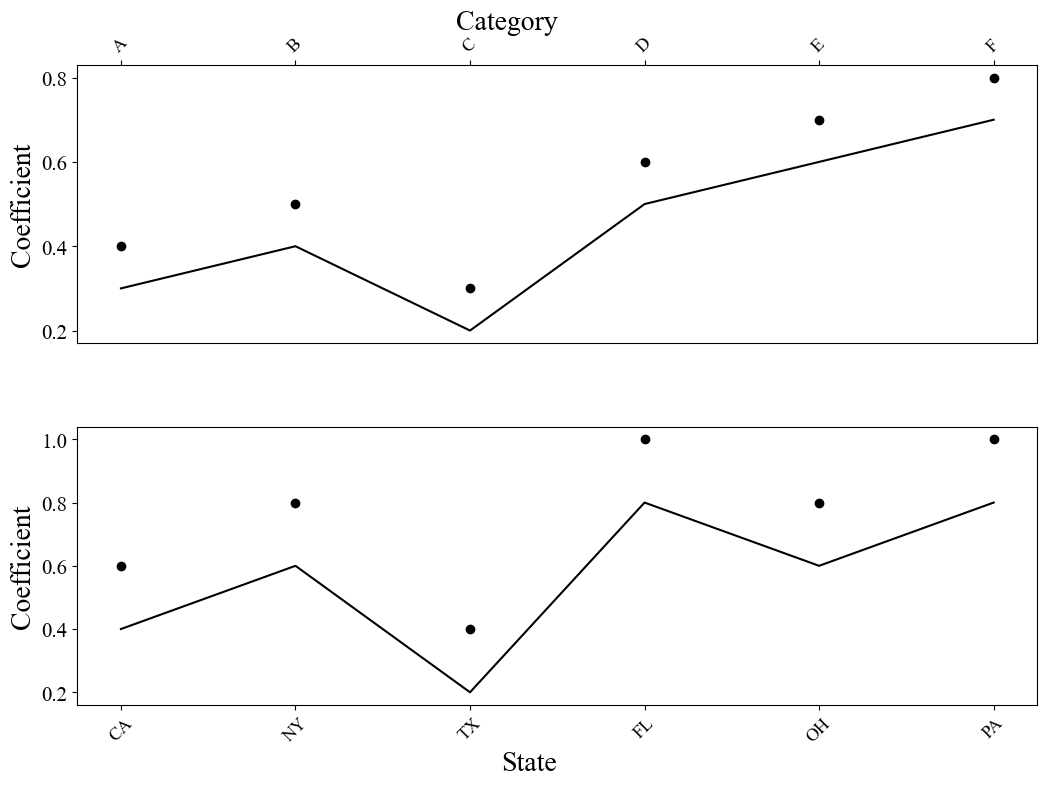

In [65]:
import matplotlib.pyplot as plt

# 设置绘图参数
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

# 生成数据
lst = ['A', 'B', 'C', 'D', 'E', 'F']
coef = [0.5, 0.6, 0.4, 0.7, 0.8, 0.9]
coef_p = [0.6, 0.7, 0.5, 0.8, 0.9, 1.0]

lst1 = ['CA', 'NY', 'TX', 'FL', 'OH', 'PA']
coef1 = [0.7, 0.8, 0.6, 0.9, 0.8, 0.9]
coef_p1 = [0.8, 0.9, 0.7, 1.0, 0.9, 1.0]

# 创建包含两个子图的图形窗口
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), dpi=100)

# 在第一个子图中绘制图像，将 x 轴刻度线和标签移到上方
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.plot(lst, coef, color='black')
ax1.scatter(lst, coef_p, color='black')
ax1.set_xticklabels(lst, rotation=45, size=13)
ax1.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], size=15)
ax1.set_xlabel('Category', fontsize=20, ha='right')
ax1.set_ylabel('Coefficient', fontsize=20)

# 在第二个子图中绘制图像，将 x 轴刻度线和标签移到下方
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.plot(lst1, coef1, color='black')
ax2.scatter(lst1, coef_p1, color='black')
ax2.set_xticklabels(lst1, rotation=45, size=13)
ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], size=15)
ax2.set_xlabel('State', fontsize=20, ha='right')
ax2.set_ylabel('Coefficient', fontsize=20)

# 调整子图之间的间距和边距
plt.subplots_adjust(hspace=0.3, left=0.1, right=0.9, top=0.9, bottom=0.1)



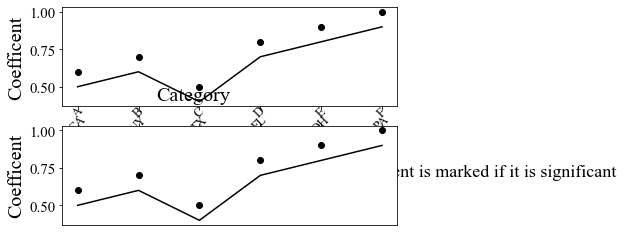

In [67]:
import matplotlib.pyplot as plt

# 第一个子图
plt.subplot(2, 1, 1)
plt.xticks(rotation=45)
plt.plot(lst1,coef,color='black')
plt.scatter(lst1,coef_p,color='black')
plt.text('OH',-0.1,'A coefficient is marked if it is significant ',fontsize=18)
plt.xticks(size=13)
plt.yticks(size=15)
plt.xlabel("State", fontproperties='Times New Roman',fontsize=20,ha='right')
plt.ylabel("Coefficent",fontproperties='Times New Roman', fontsize=20)

# 第二个子图
plt.subplot(2, 1, 2)
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45)
plt.plot(lst,coef,color='black')
plt.scatter(lst,coef_p,color='black')
#plt.text('OH',-0.1,'A coefficient is marked if it is significant ',fontsize=18)
plt.xticks(size=13)
plt.yticks(size=15)
plt.xlabel("Category", fontproperties='Times New Roman',fontsize=20,ha='right')
plt.ylabel("Coefficent",fontproperties='Times New Roman', fontsize=20)

# 共享y轴刻度标签
#plt.subplots_adjust(hspace=0.4)
plt.yticks(size=15)
plt.show()


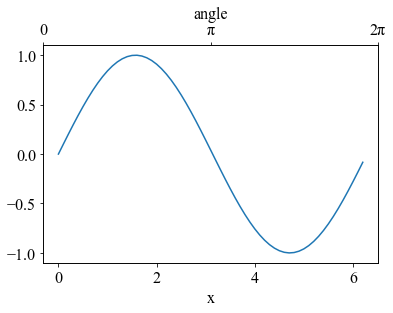

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# 创建数据
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)

# 绘制图形
fig, ax = plt.subplots()
ax.plot(x, y)

# 创建镜像的x轴
ax2 = ax.twiny()

# 在镜像的x轴上面设置另外一组刻度标签
ax2.set_xticks([0, np.pi, 2*np.pi])
ax2.set_xticklabels(['0', 'π', '2π'])

# 设置x轴标签
ax.set_xlabel('x')
ax2.set_xlabel('angle')

# 显示图形
plt.show()


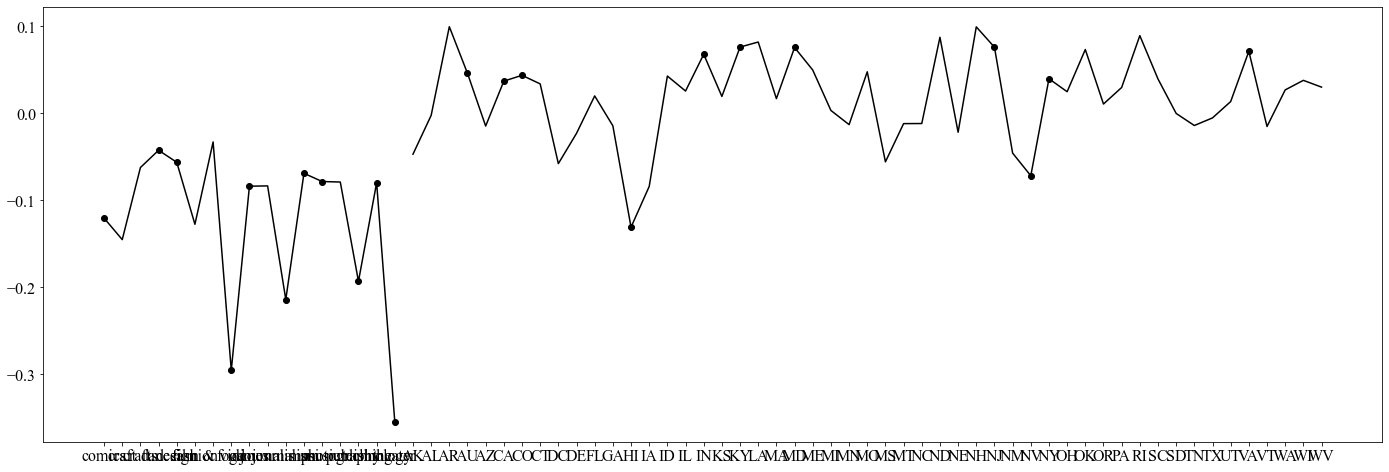

In [90]:
plt.figure(figsize=(24,8))
#第一
plt.plot(lst,coef,color='black')
plt.scatter(lst,coef_p,color='black')
#第二
plt.plot(lst1,coef1,color='black')
plt.scatter(lst1,coef_p1,color='black')

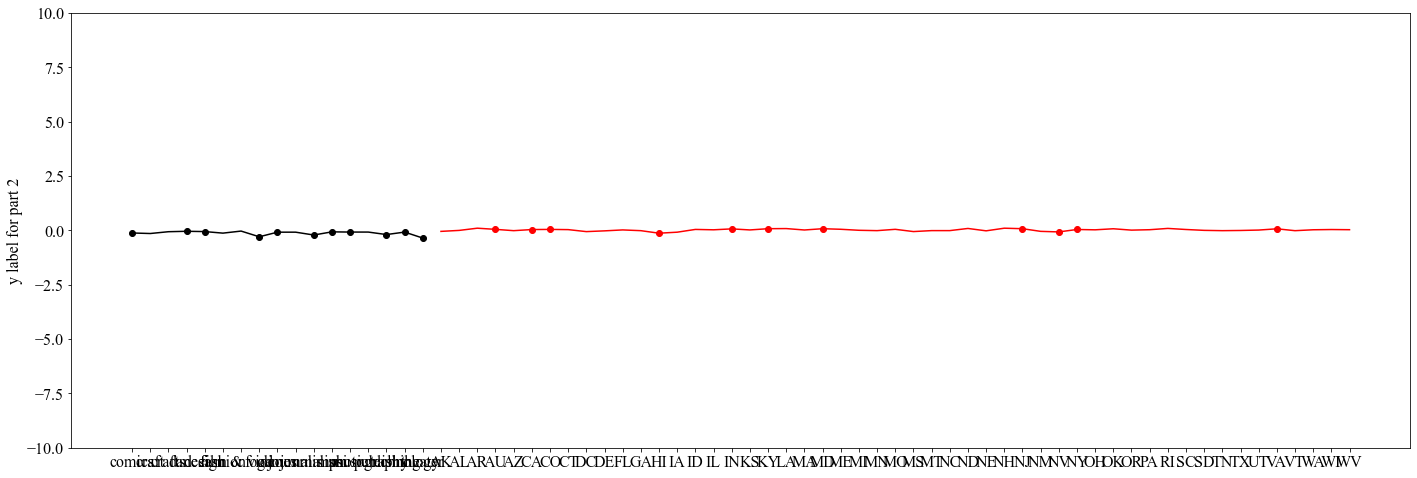

In [91]:
fig, ax = plt.subplots(figsize=(24, 8))

# 第一部分
ax.plot(lst, coef, color='black')
ax.scatter(lst, coef_p, color='black')
ax.set_ylabel('y label for part 1')
ax.set_ylim([-1, 1]) # 调整y轴范围

# 第二部分
ax.plot(lst1, coef1, color='red')
ax.scatter(lst1, coef_p1, color='red')
ax.set_ylabel('y label for part 2')
ax.set_ylim([-10, 10]) # 调整y轴范围

plt.show()


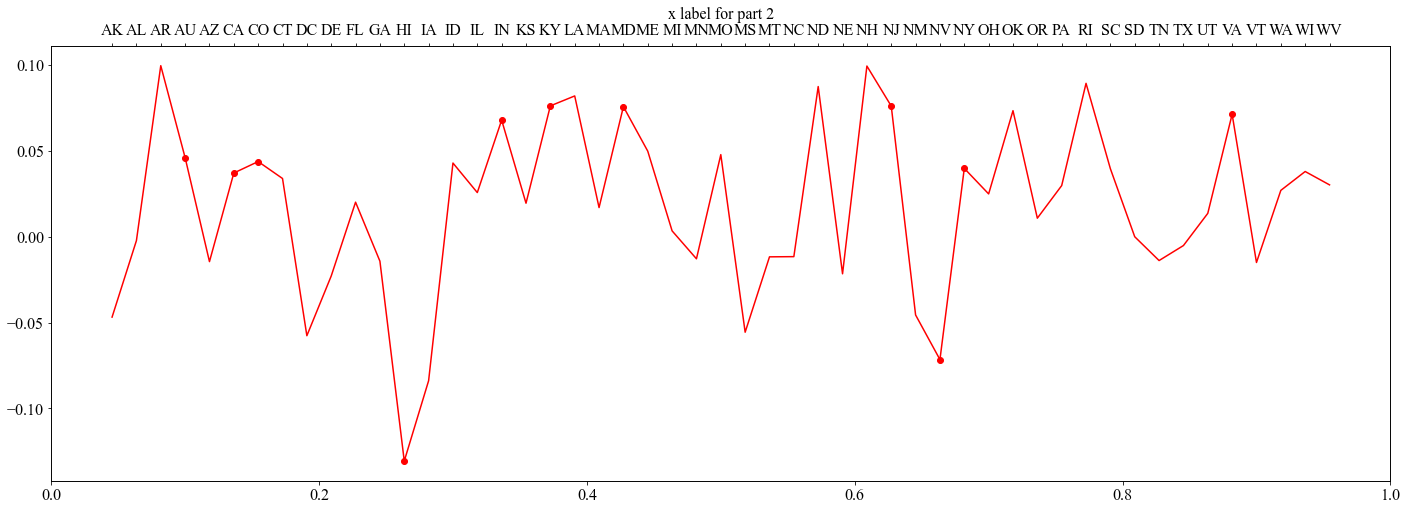

In [97]:
fig, ax = plt.subplots(figsize=(24, 8))

# 第一部分
ax2 = ax.twiny() # 创建共享y轴的第二个x轴
ax2.plot(lst1, coef1, color='red')
ax2.scatter(lst1, coef_p1, color='red')
ax2.set_xlabel('x label for part 2')
ax2.xaxis.tick_top() # 将刻度线和标签移动到顶部
ax2.xaxis.set_label_position('top')
#ax2.set_xlim(ax.get_xlim()) # 设置x轴范围与第一部分相同



In [ ]:
plt.xticks(rotation=45)
plt.plot(lst,coef11,color='purple',alpha=0.7,linewidth=2,label='Duration<=30')
plt.scatter(lst,coef_p11,color='purple',alpha=0.7,marker='^')
plt.plot(lst,coef12,color='black',linewidth=2,label='30<Duration<=60')
plt.scatter(lst,coef_p12,color='black')
plt.plot(lst,coef13,color='grey',linewidth=2,label='Duration>60')
plt.scatter(lst,coef_p13,color='grey',marker=',')
plt.legend(fontsize='large') 
plt.xlabel("State", fontproperties='Times New Roman',fontsize=20,ha='right')
plt.ylabel("Coefficent",fontproperties='Times New Roman', fontsize=20)
plt.text('OH',-0.5,'A coefficient is marked if it is significant ',fontsize=18)
plt.xticks(size=13)
plt.yticks(size=15)
plt.savefig('3',dpi=900)



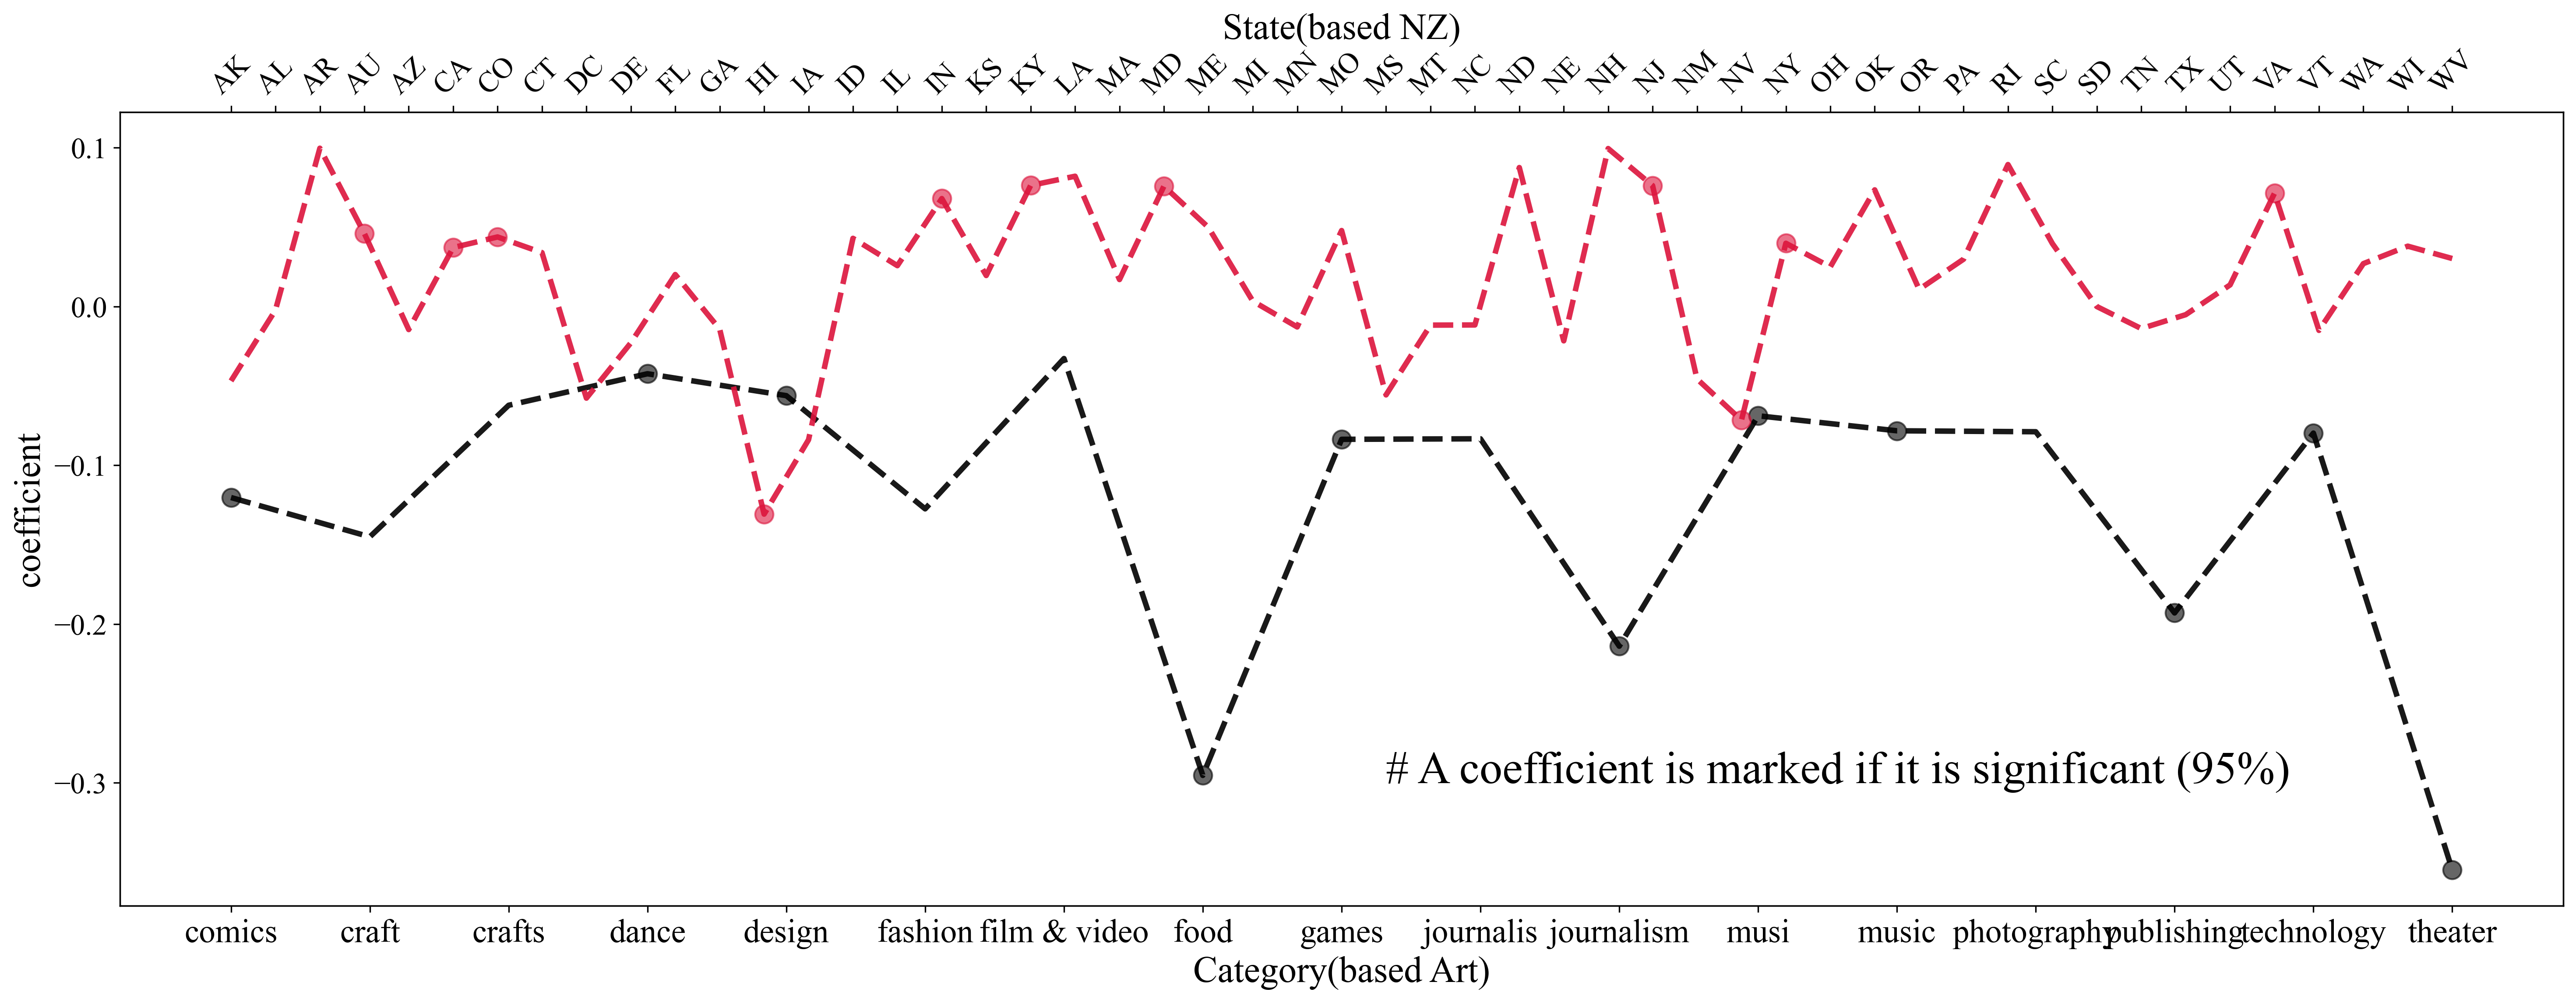

In [142]:
fig, ax = plt.subplots(figsize=(24, 8),dpi=300)

# 第一部分
ax.plot(lst, coef, linestyle='--',color='black',linewidth=3,alpha=0.9)
ax.scatter(lst, coef_p, color='black',s=100,alpha=0.6)
ax.set_ylabel('coefficient',fontsize=20)
plt.xlabel('Category(based Art)',size=20)
plt.xticks(size=18)
# 第二部分
ax2 = ax.twiny() 
ax2.plot(lst1, coef1,linestyle='--', linewidth=3,color='crimson',alpha=0.9)
ax2.scatter(lst1, coef_p1, color='crimson',s=100,alpha=0.6)
ax2.set_xlabel('State(based NZ)',size=20)
plt.xticks(rotation=45)
ax2.xaxis.tick_top() 
ax2.xaxis.set_label_position('top')
plt.text('MS',-0.3,'# A coefficient is marked if it is significant (95%) ',fontsize=25)
plt.savefig('category&state',dpi=300)
